In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from pandas.plotting import table
import pingouin as pg
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
# Create acs_df, and acs_corr_df which excludes non-numerical columns
acs_df = pd.read_csv('Data/Cleaned_ACS.csv').drop(columns="Unnamed: 0")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Cleaned_ACS.csv'

In [1]:
# Create plans_df, and plans_corr_df which excludes non-numerical columns
plans_df = pd.read_csv('Data/Cleaned_Health_Plans.csv').drop(columns="Unnamed: 0")

NameError: name 'pd' is not defined

In [26]:
# Create correlation matrix for all variables, nationwide
indep_corr = plans_df.corr()
indep_corr

ehb_percent_of_total_premium  \
ehb_percent_of_total_premium                                           1.000000   
premium_child_age_0-14                                                 0.106403   
premium_child_age_18                                                   0.112859   
premium_adult_individual_age_21                                        0.109252   
premium_adult_individual_age_27                                        0.091911   
premium_adult_individual_age_30_                                       0.097486   
premium_adult_individual_age_40_                                       0.101127   
premium_adult_individual_age_50_                                       0.099322   
premium_adult_individual_age_60_                                       0.103865   
premium_couple_21__                                                    0.109252   
premium_couple_30_                                                     0.097486   
premium_couple_40_                                                     0.101127   
premium_couple_50_                                                     0.099322   
premium_couple_60_                                                     0.103865   
couple+1_child_age_21                                                  0.108593   
couple+1_child_age_30_                                                 0.099915   
couple+1_child_age_40_                                                 0.102480   
couple+1_child_age_50_                                                 0.100696   
couple+2_children_age_21                                               0.108175   
couple+2_children_age_30_                                              0.101310   
couple+2_children_age_40_                                              0.103286   
couple+2_children_age_50                                               0.101627   
couple+3_or_more_children_age_21                                       0.107889   
couple+3_or_more_children_age_30                                       0.102214   
couple+3_or_more_children_age_40                                       0.103819   
couple+3_or_more_children_age_50                                       0.102299   
individual+1_child_age_21                                              0.108175   
individual+1_child_age_30                                              0.101310   
individual+1_child_age_40                                              0.103286   
individual+1_child_age_50                                              0.101627   
individual+2_children_age_21                                           0.107681   
individual+2_children_age_30                                           0.102846   
individual+2_children_age_40                                           0.104197   
individual+2_children_age_50                                           0.102806   
individual+3_or_more_children_age_21                                   0.107402   
individual+3_or_more_children_age_30                                   0.103672   
individual+3_or_more_children_age_40                                   0.104698   
individual+3_or_more_children_age_50                                   0.103520   
medical_deductible_individual_standard                                -0.050391   
medical_deductible_family_standard                                    -0.040737   
medical_maximum_out_of_pocket_individual_standard                      0.022515   
medical_maximum_out_of_pocket_family_standard                          0.022929   

                                                   premium_child_age_0-14  \
ehb_percent_of_total_premium                                     0.106403   
premium_child_age_0-14                                           1.000000   
premium_child_age_18                                             0.993957   
premium_adult_individual_age_21                                  0.993876   
premium_adult_individual_age_27                                  0.986284   
premium_adult_indiv

In [27]:
# Find independent variables that are distinct from each other; we will have only four different independent variables
# that are distinct from each other: ehb_percent_of_total_premium, premium_values, medical_deductible_standard,
# and medical_maximum_out_of_pocket
indep_corr = indep_corr[(indep_corr < 0.75) & (indep_corr > -0.75)]
indep_corr

ehb_percent_of_total_premium  \
ehb_percent_of_total_premium                                                NaN   
premium_child_age_0-14                                                 0.106403   
premium_child_age_18                                                   0.112859   
premium_adult_individual_age_21                                        0.109252   
premium_adult_individual_age_27                                        0.091911   
premium_adult_individual_age_30_                                       0.097486   
premium_adult_individual_age_40_                                       0.101127   
premium_adult_individual_age_50_                                       0.099322   
premium_adult_individual_age_60_                                       0.103865   
premium_couple_21__                                                    0.109252   
premium_couple_30_                                                     0.097486   
premium_couple_40_                                                     0.101127   
premium_couple_50_                                                     0.099322   
premium_couple_60_                                                     0.103865   
couple+1_child_age_21                                                  0.108593   
couple+1_child_age_30_                                                 0.099915   
couple+1_child_age_40_                                                 0.102480   
couple+1_child_age_50_                                                 0.100696   
couple+2_children_age_21                                               0.108175   
couple+2_children_age_30_                                              0.101310   
couple+2_children_age_40_                                              0.103286   
couple+2_children_age_50                                               0.101627   
couple+3_or_more_children_age_21                                       0.107889   
couple+3_or_more_children_age_30                                       0.102214   
couple+3_or_more_children_age_40                                       0.103819   
couple+3_or_more_children_age_50                                       0.102299   
individual+1_child_age_21                                              0.108175   
individual+1_child_age_30                                              0.101310   
individual+1_child_age_40                                              0.103286   
individual+1_child_age_50                                              0.101627   
individual+2_children_age_21                                           0.107681   
individual+2_children_age_30                                           0.102846   
individual+2_children_age_40                                           0.104197   
individual+2_children_age_50                                           0.102806   
individual+3_or_more_children_age_21                                   0.107402   
individual+3_or_more_children_age_30                                   0.103672   
individual+3_or_more_children_age_40                                   0.104698   
individual+3_or_more_children_age_50                                   0.103520   
medical_deductible_individual_standard                                -0.050391   
medical_deductible_family_standard                                    -0.040737   
medical_maximum_out_of_pocket_individual_standard                      0.022515   
medical_maximum_out_of_pocket_family_standard                          0.022929   

                                                   premium_child_age_0-14  \
ehb_percent_of_total_premium                                     0.106403   
premium_child_age_0-14                                                NaN   
premium_child_age_18                                                  NaN   
premium_adult_individual_age_21                                       NaN   
premium_adult_individual_age_27                                       NaN   
premium_adult_indiv

In [28]:
plans_df

plan_id    state metal_level  \
0      38344AK1060001   Alaska        Gold   
1      38344AK1060002   Alaska      Silver   
2      38344AK1060004   Alaska      Bronze   
3      38344AK1070001   Alaska      Silver   
4      38344AK1070002   Alaska      Bronze   
...               ...      ...         ...   
42231  11269WY0070018  Wyoming      Silver   
42232  11269WY0070019  Wyoming      Bronze   
42233  11269WY0070022  Wyoming      Bronze   
42234  11269WY0070023  Wyoming      Silver   
42235  11269WY0070024  Wyoming        Gold   

                                    issuer_name  \
0      Premera Blue Cross Blue Shield of Alaska   
1      Premera Blue Cross Blue Shield of Alaska   
2      Premera Blue Cross Blue Shield of Alaska   
3      Premera Blue Cross Blue Shield of Alaska   
4      Premera Blue Cross Blue Shield of Alaska   
...                                         ...   
42231         Blue Cross Blue Shield of Wyoming   
42232         Blue Cross Blue Shield of Wyoming   
42233         Blue Cross Blue Shield of Wyoming   
42234         Blue Cross Blue Shield of Wyoming   
42235         Blue Cross Blue Shield of Wyoming   

                                plan_marketing_name plan_type  \
0            Premera Blue Cross Preferred Gold 1500       PPO   
1          Premera Blue Cross Preferred Silver 4500       PPO   
2          Premera Blue Cross Preferred Bronze 6350       PPO   
3      Premera Blue Cross Preferred Silver 3000 HSA       PPO   
4      Premera Blue Cross Preferred Bronze 5250 HSA       PPO   
...                                             ...       ...   
42231                       BlueSelect Silver Value       PPO   
42232                       BlueSelect Bronze Value       PPO   
42233                     BlueSelect Bronze Balance       PPO   
42234                     BlueSelect Silver Balance       PPO   
42235                       BlueSelect Gold Balance       PPO   

       ehb_percent_of_total_premium  premium_child_age_0-14  \
0                              97.2                  412.00   
1                              97.4                  438.00   
2                              95.9                  290.00   
3                              99.9                  432.00   
4                              99.8                  300.00   
...                             ...                     ...   
42231                         100.0                  523.77   
42232                         100.0                  367.41   
42233                         100.0                  370.02   
42234                         100.0                  518.82   
42235                         100.0                  433.20   

       premium_child_age_18  premium_adult_individual_age_21  ...  \
0                    492.00                           539.00  ...   
1                    523.00                           572.00  ...   
2                    346.00                           379.00  ...   
3                    515.00                           564.00  ...   
4                    358.00                           392.00  ...   
...                     ...                              ...  ...   
42231                625.11                           684.67  ...   
42232                438.48                           480.27  ...   
42233                441.60                           483.68  ...   
42234                619.19                           678.19  ...   
42235                517.00                           566.27  ...   

       individual+2_children_age_40  individual+2_children_age_50  \
0                           1513.00                       1787.00   
1                           1608.00                       1898.00   
2                           1064.00                       1257.00   
3                           1585.00                       1872.00   
4                           1101.00                       1300.00   
...                             ...                           ...  

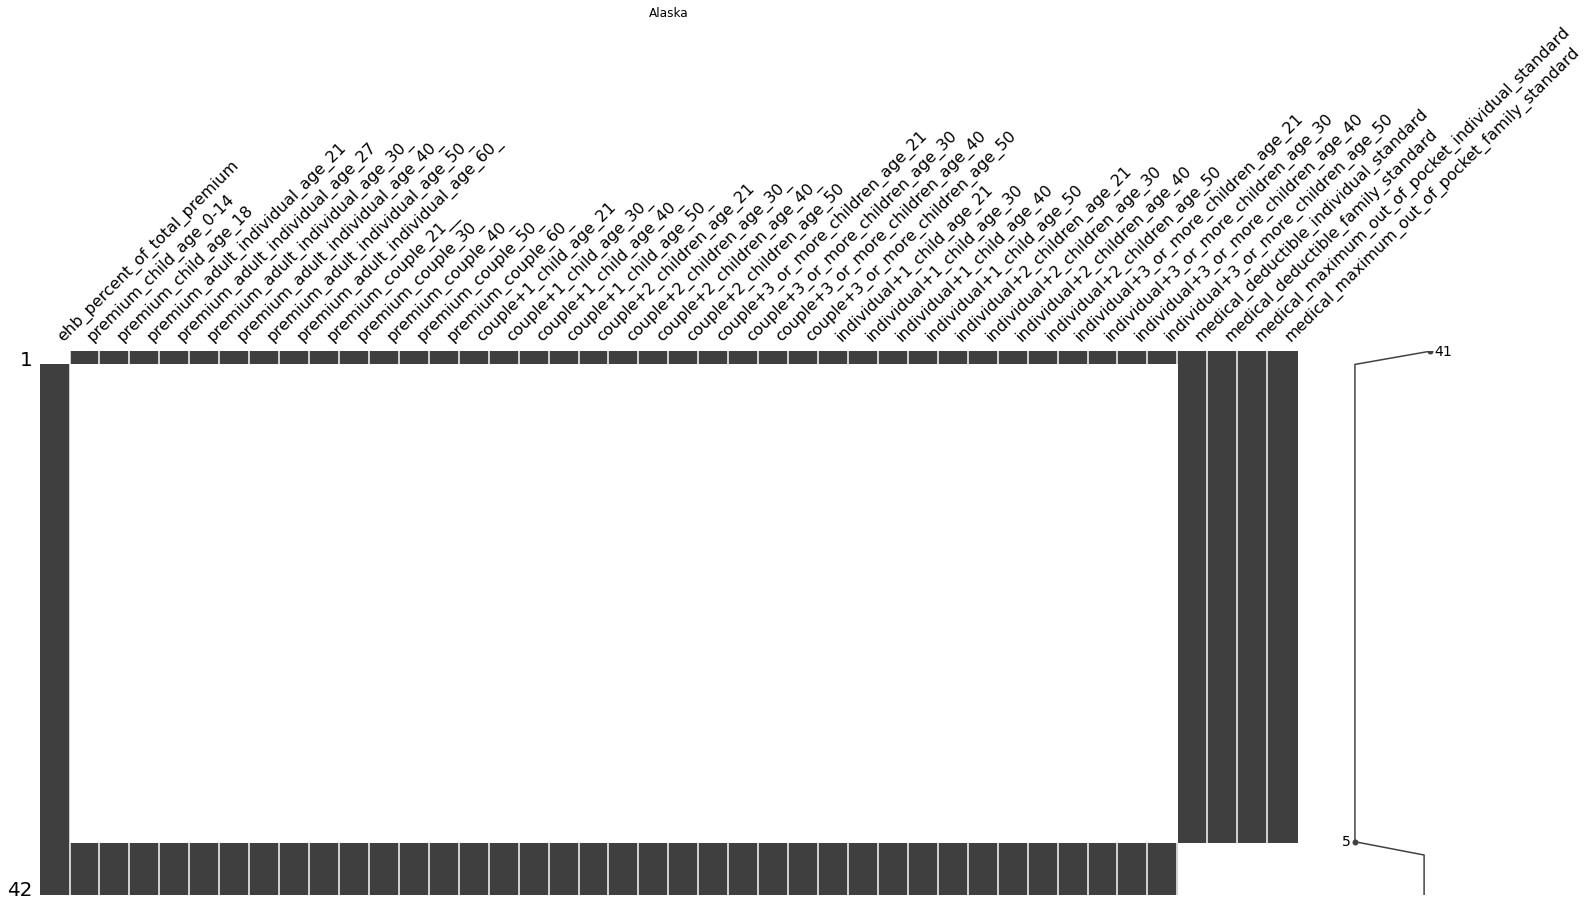

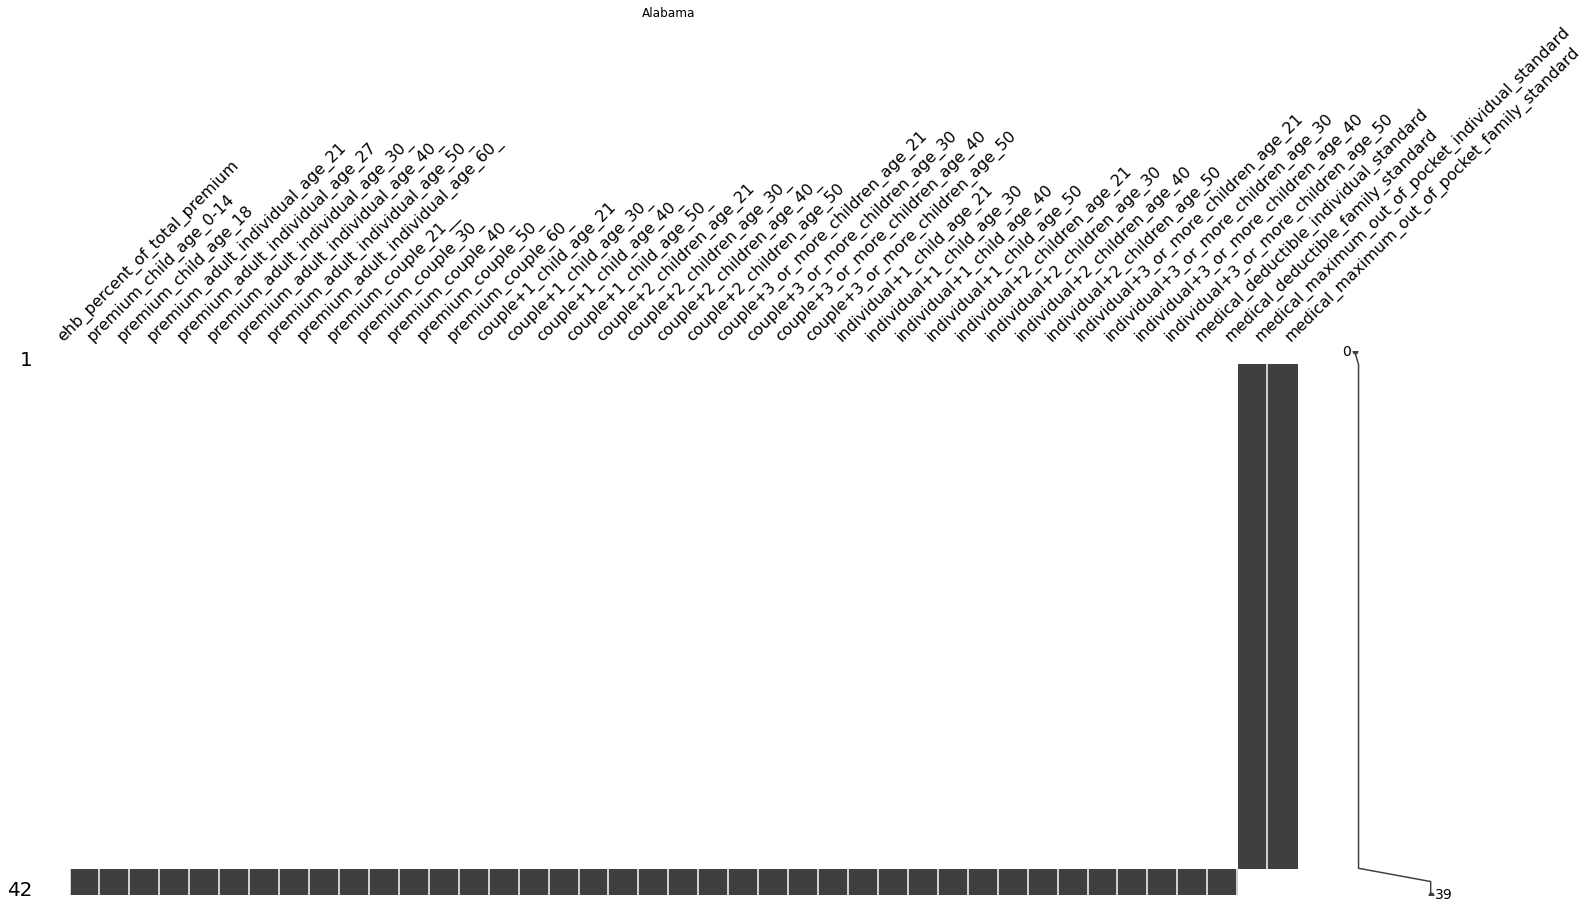

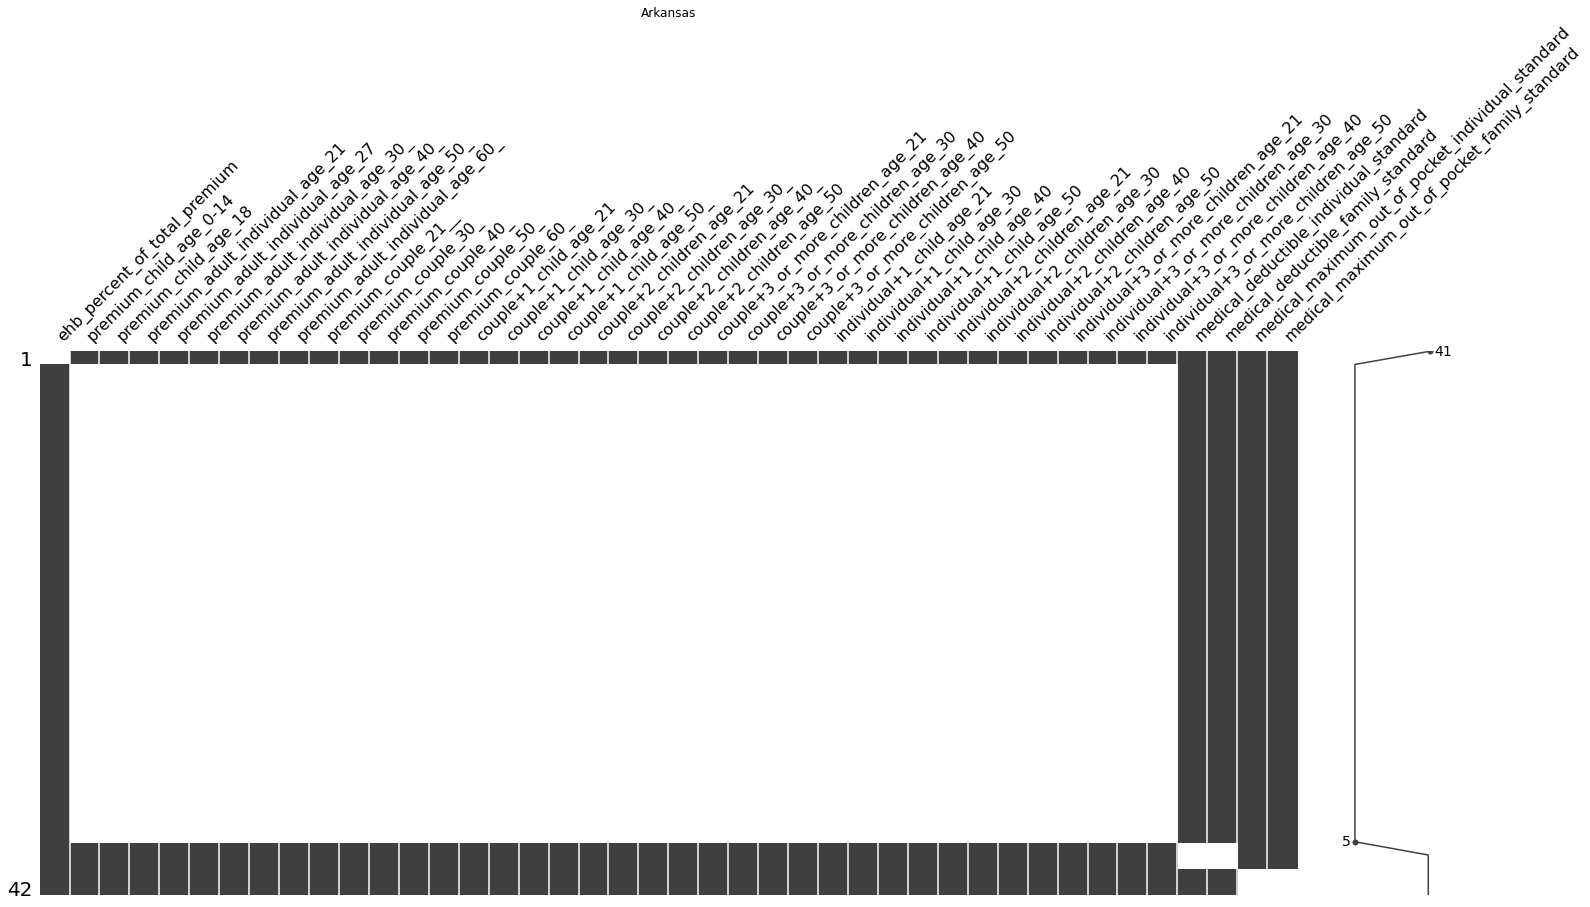

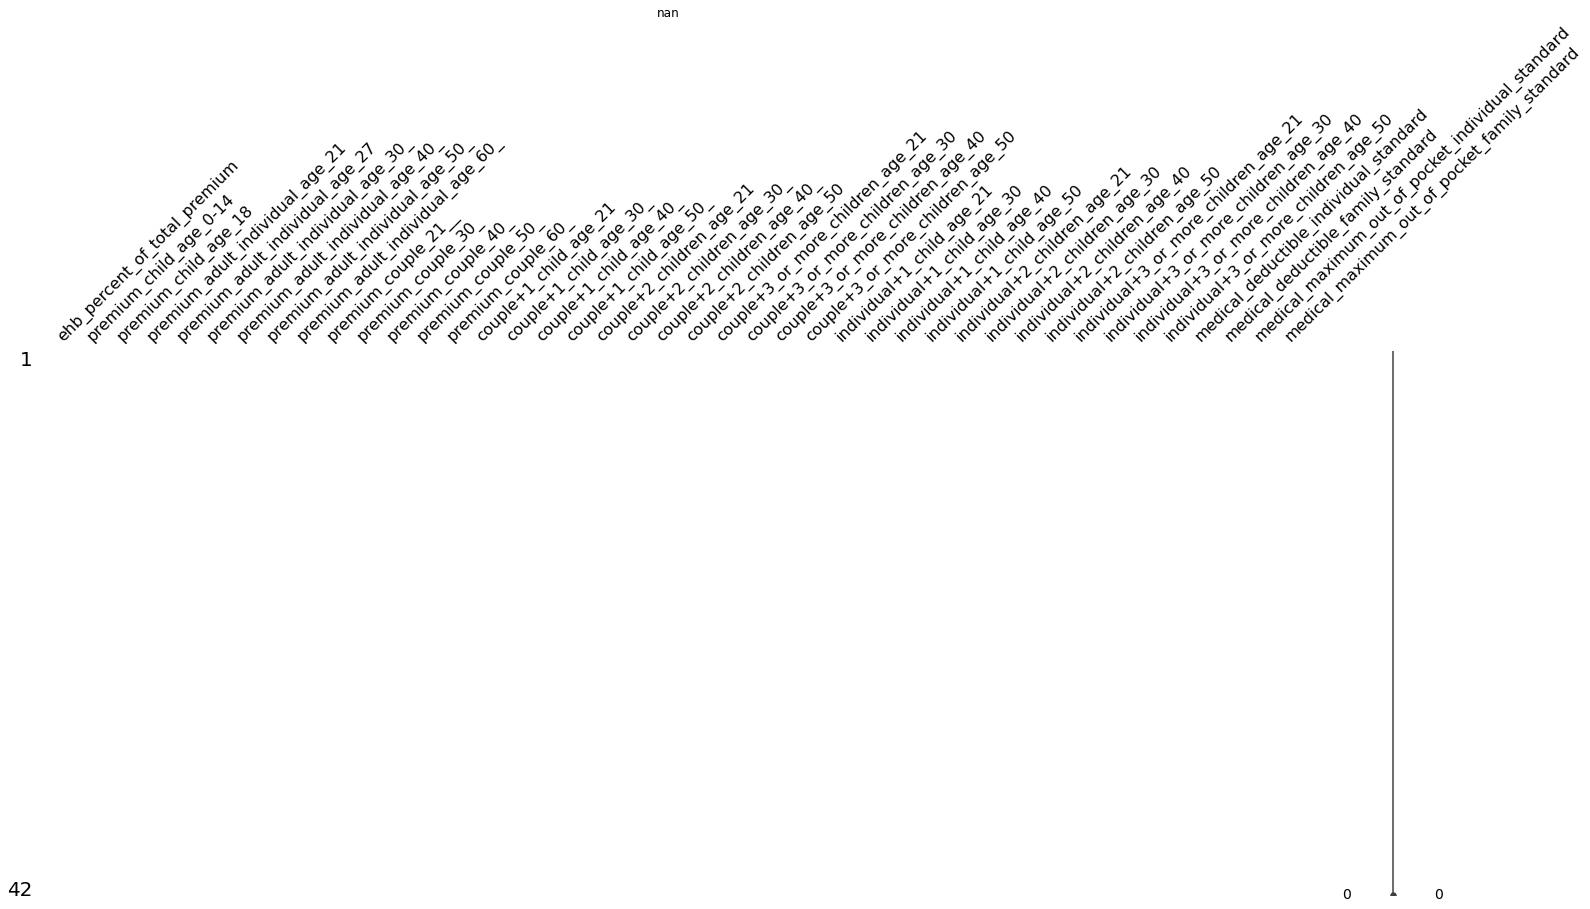

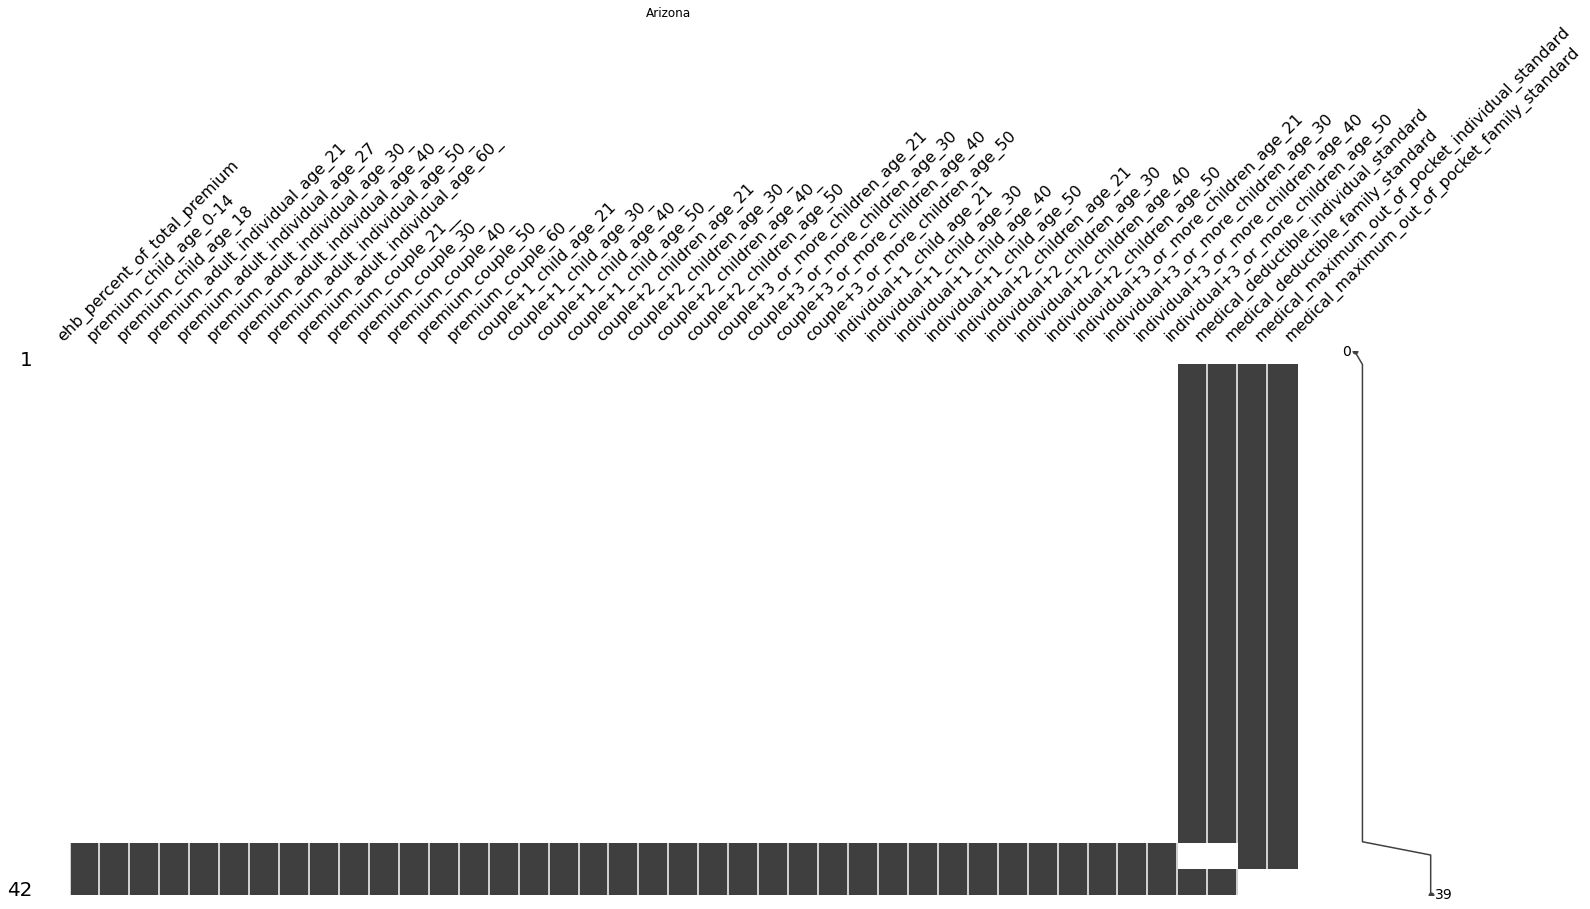

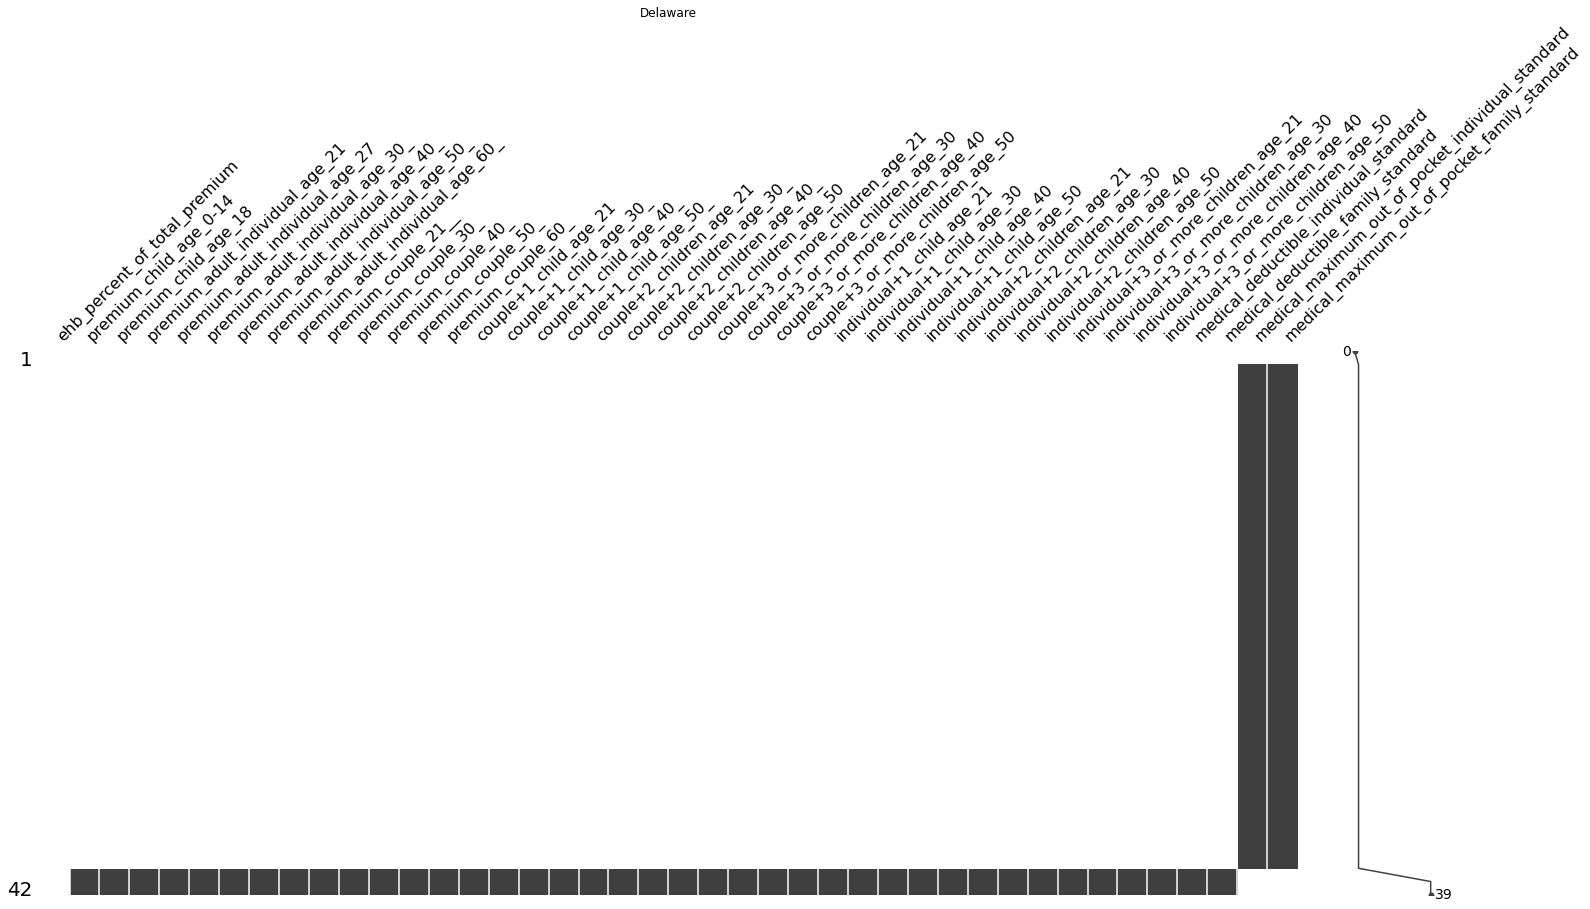

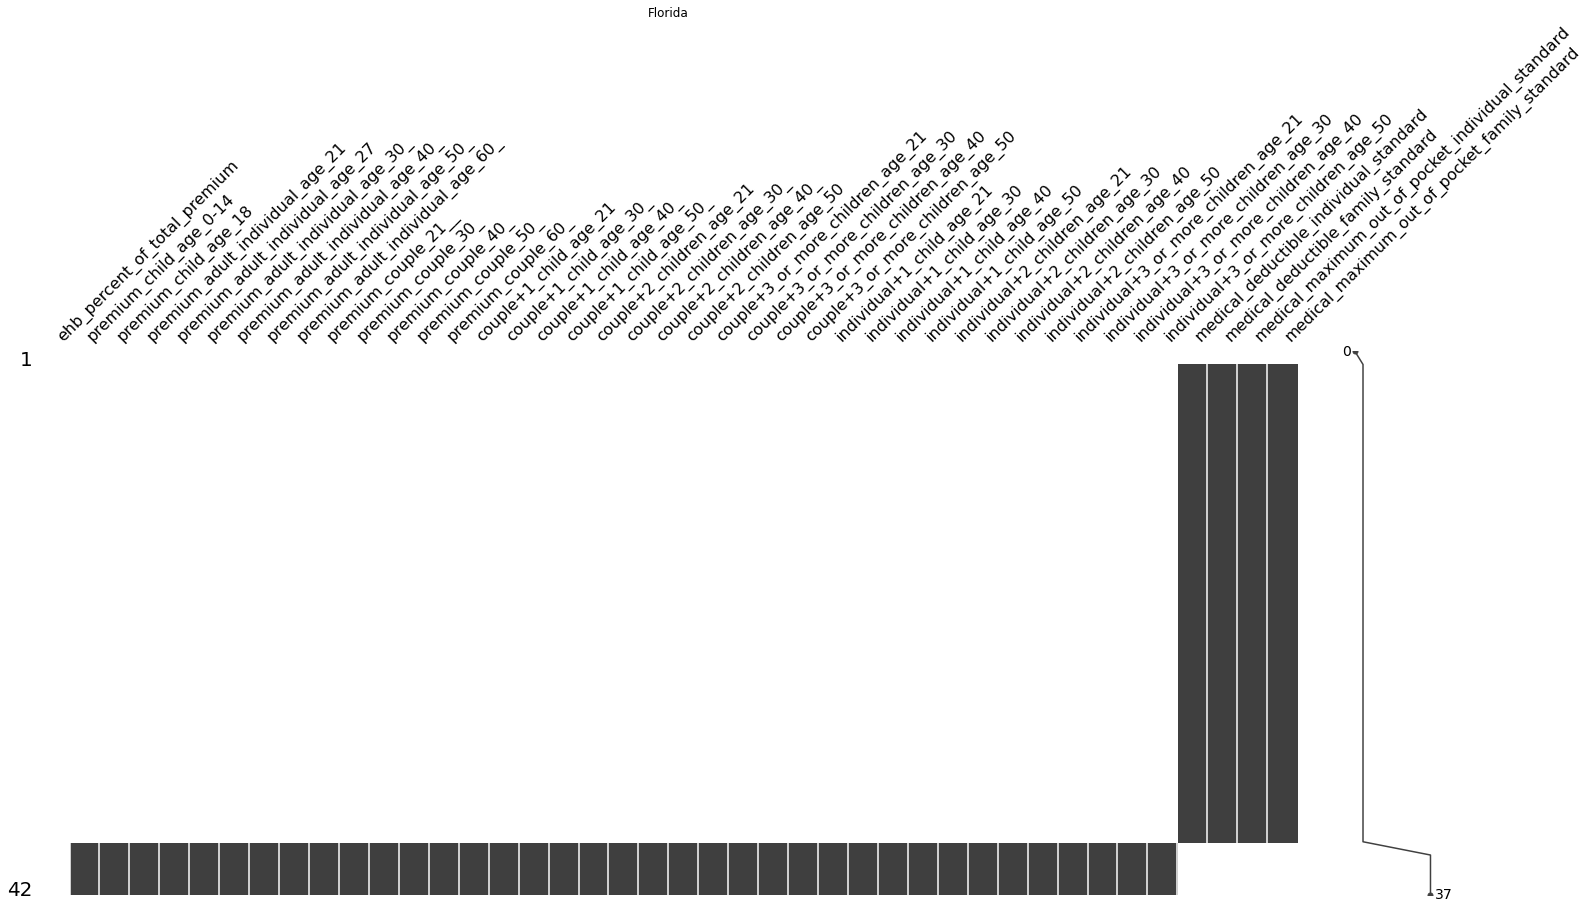

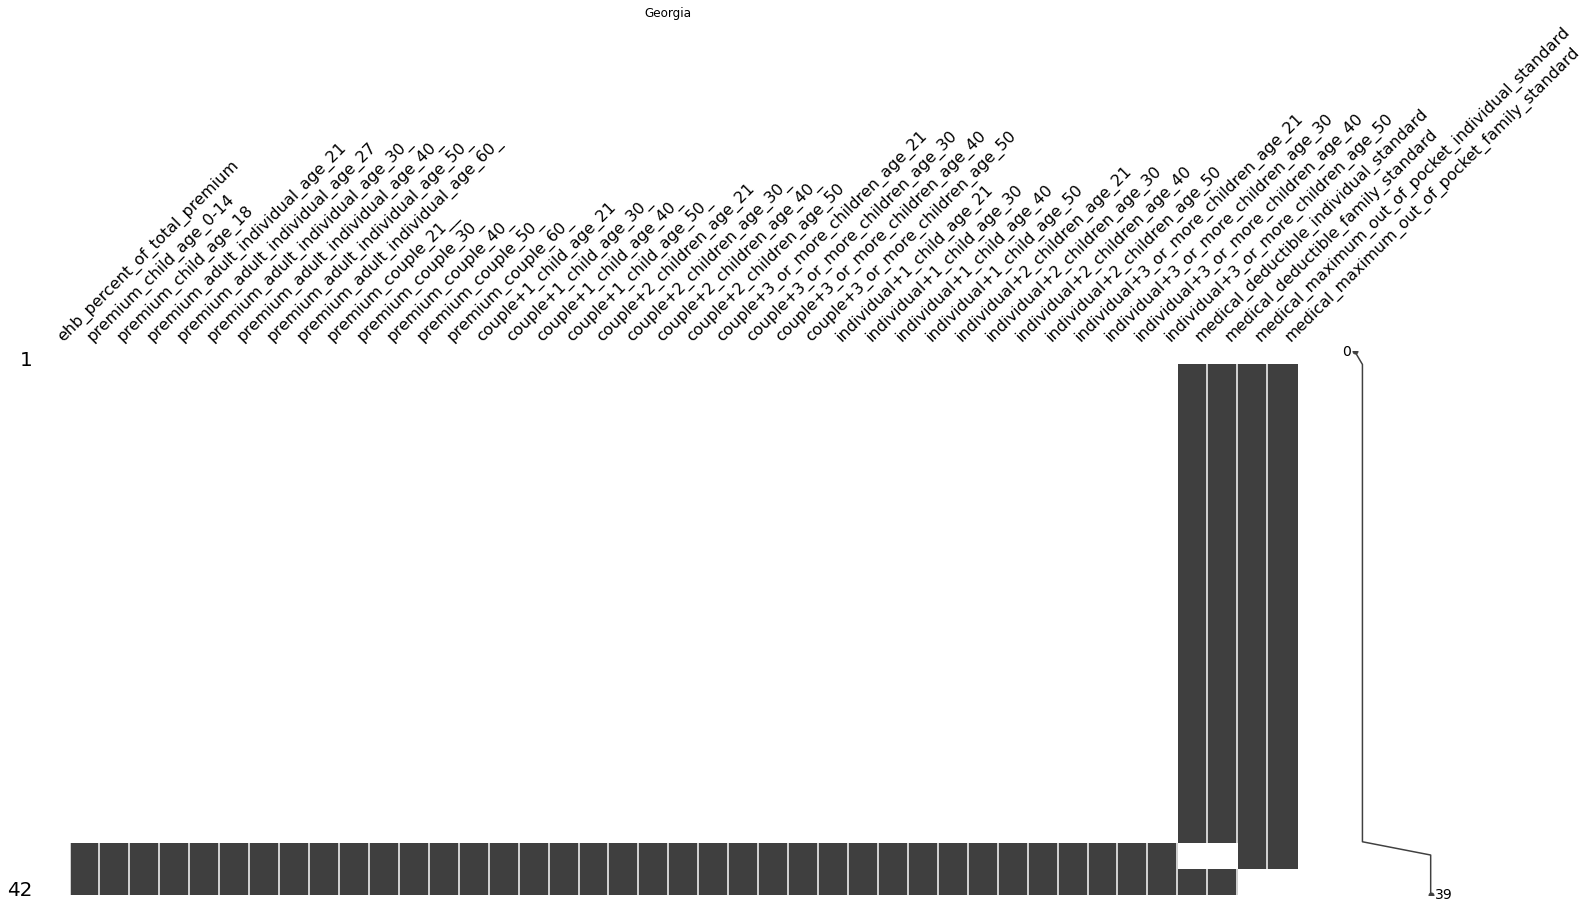

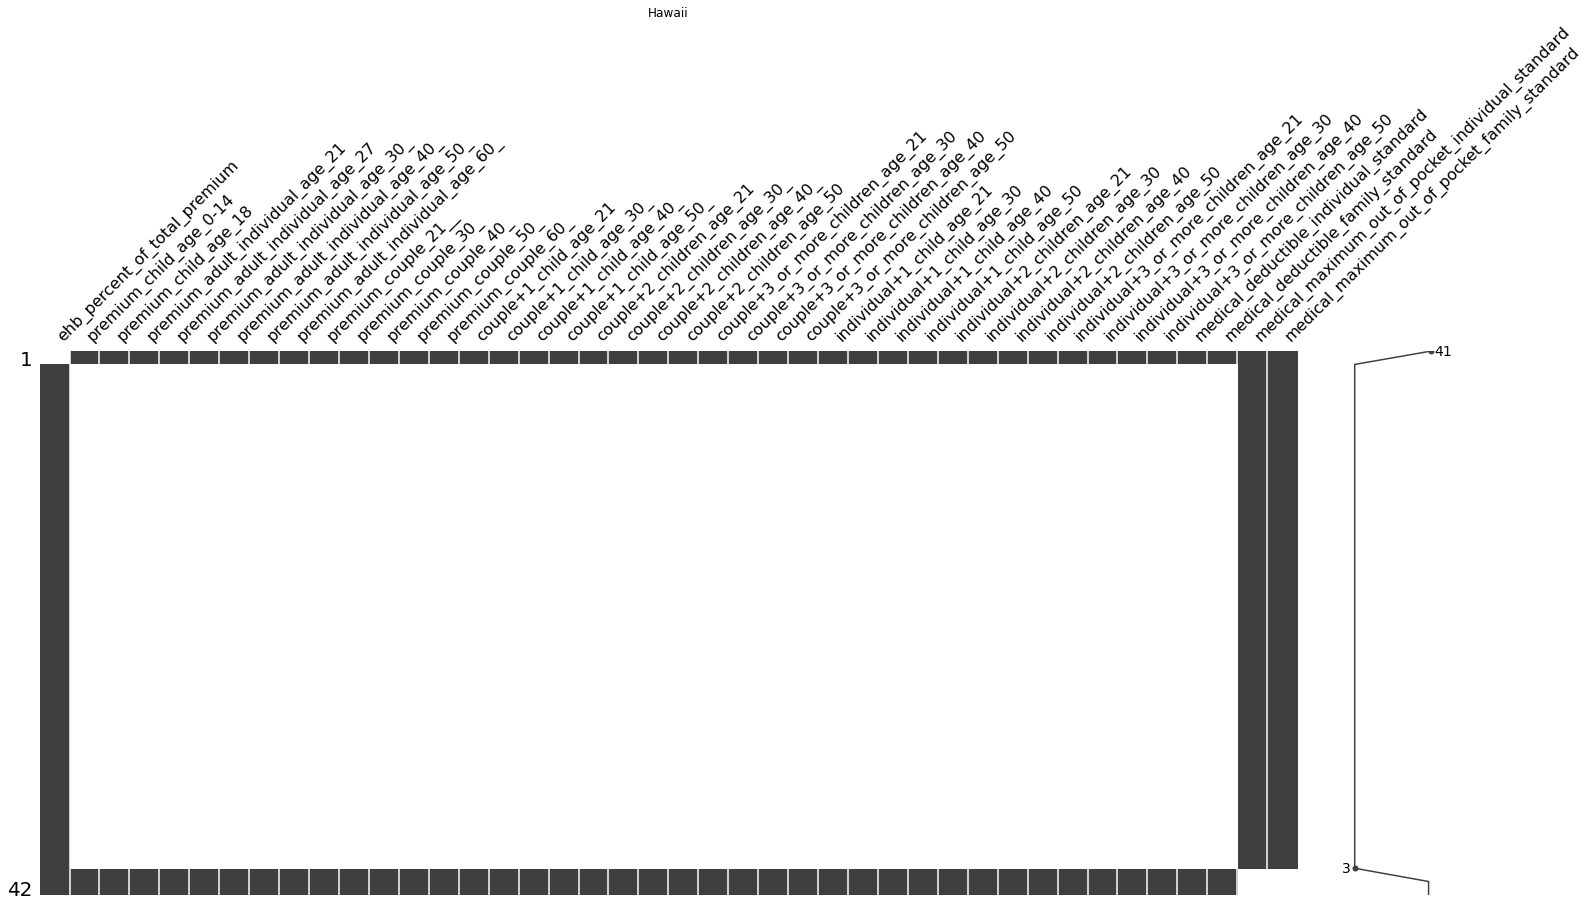

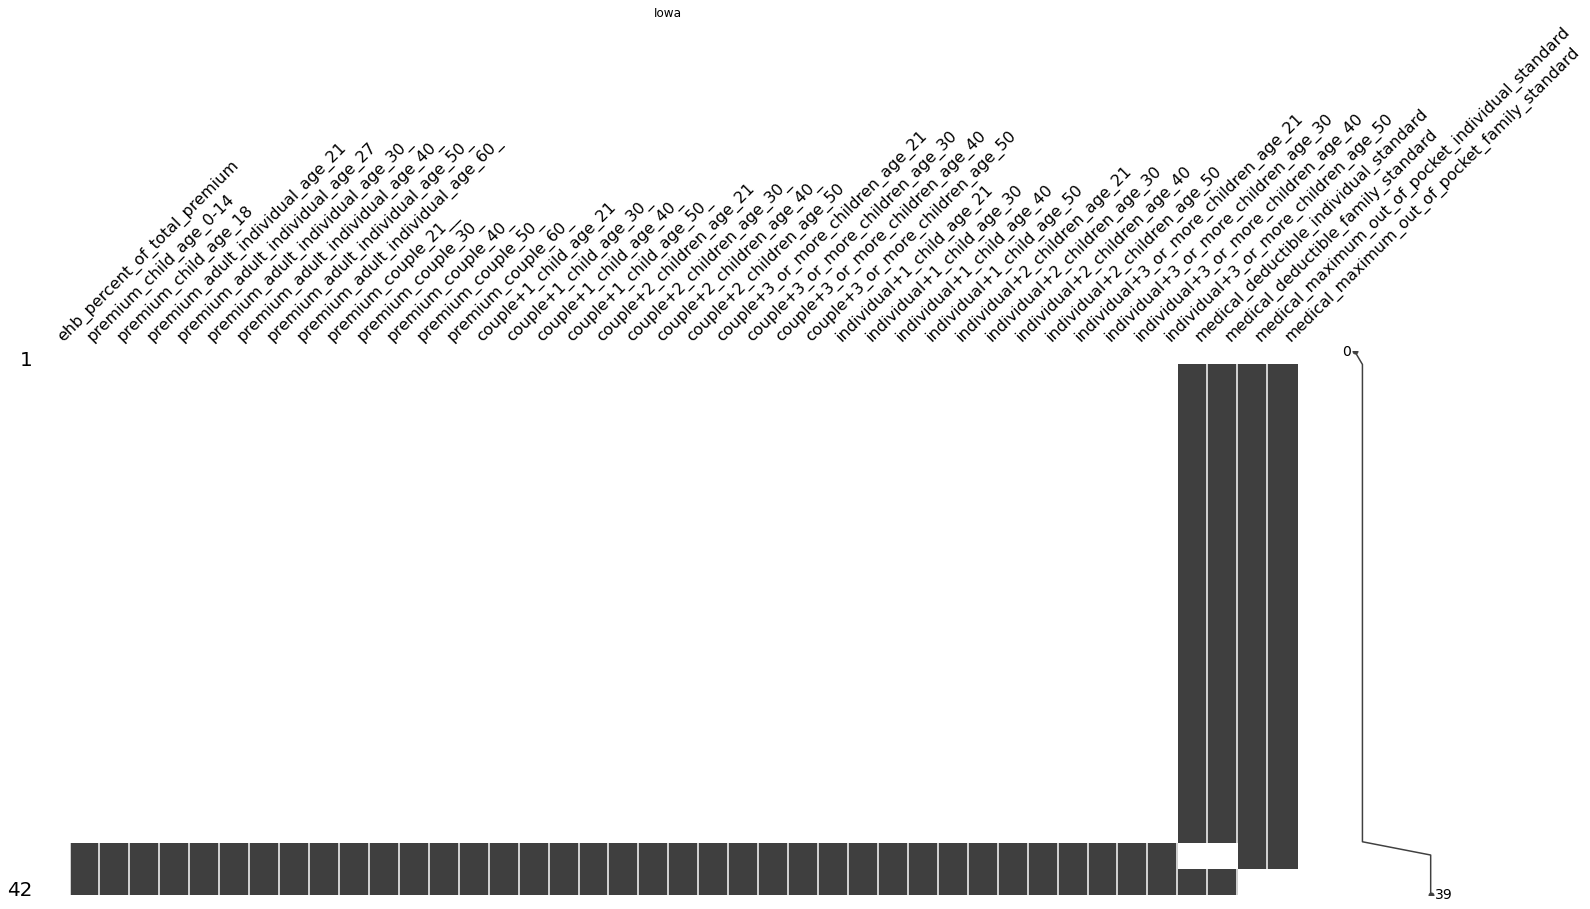

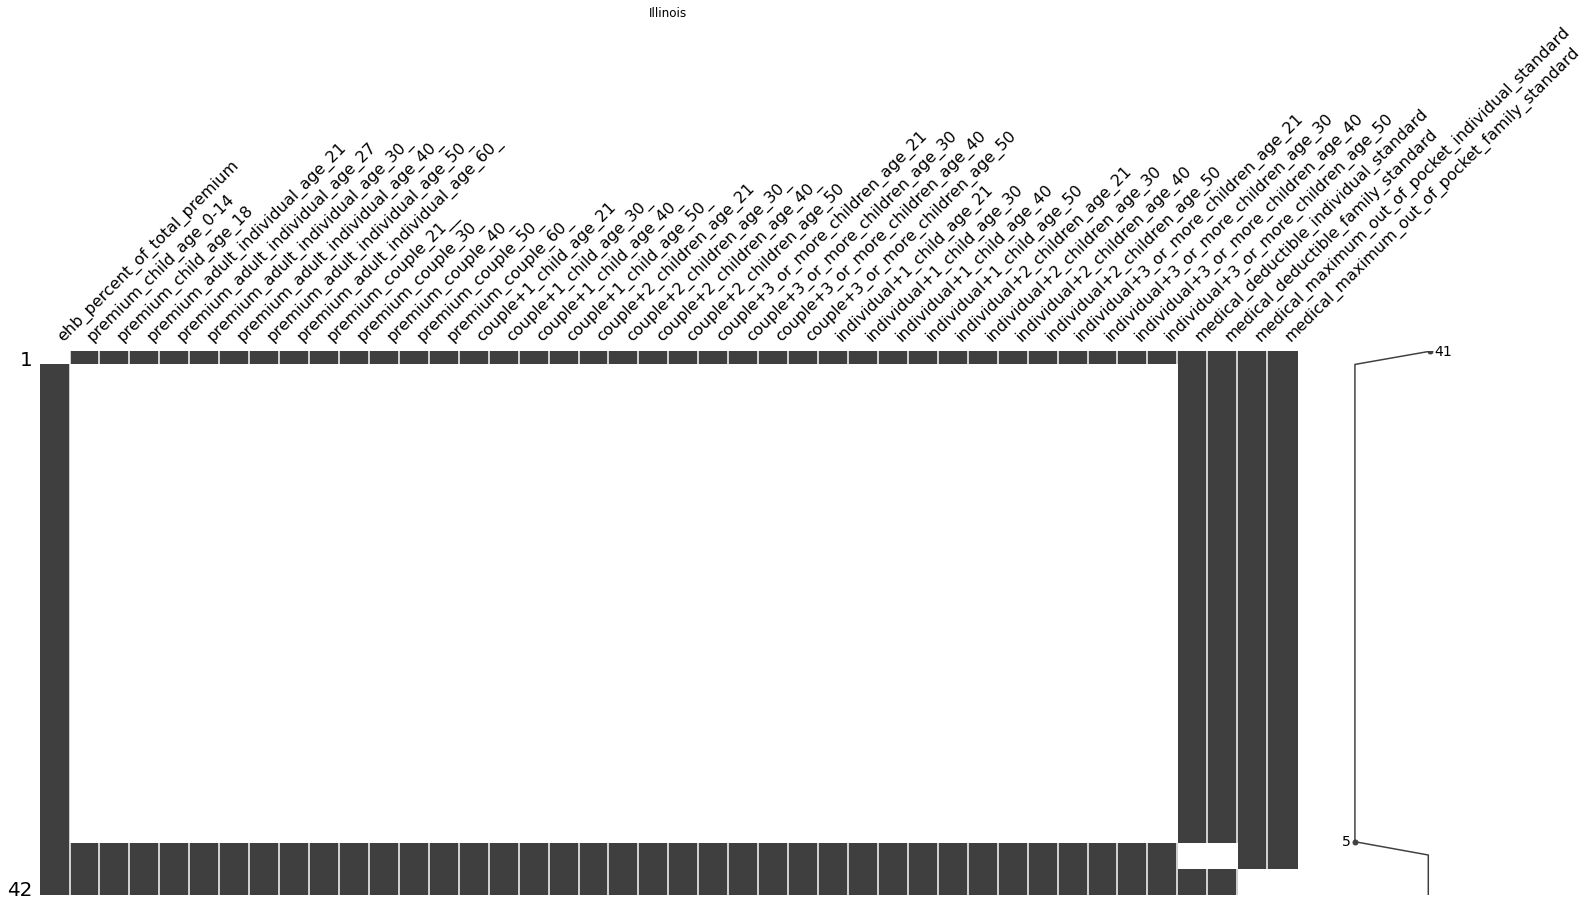

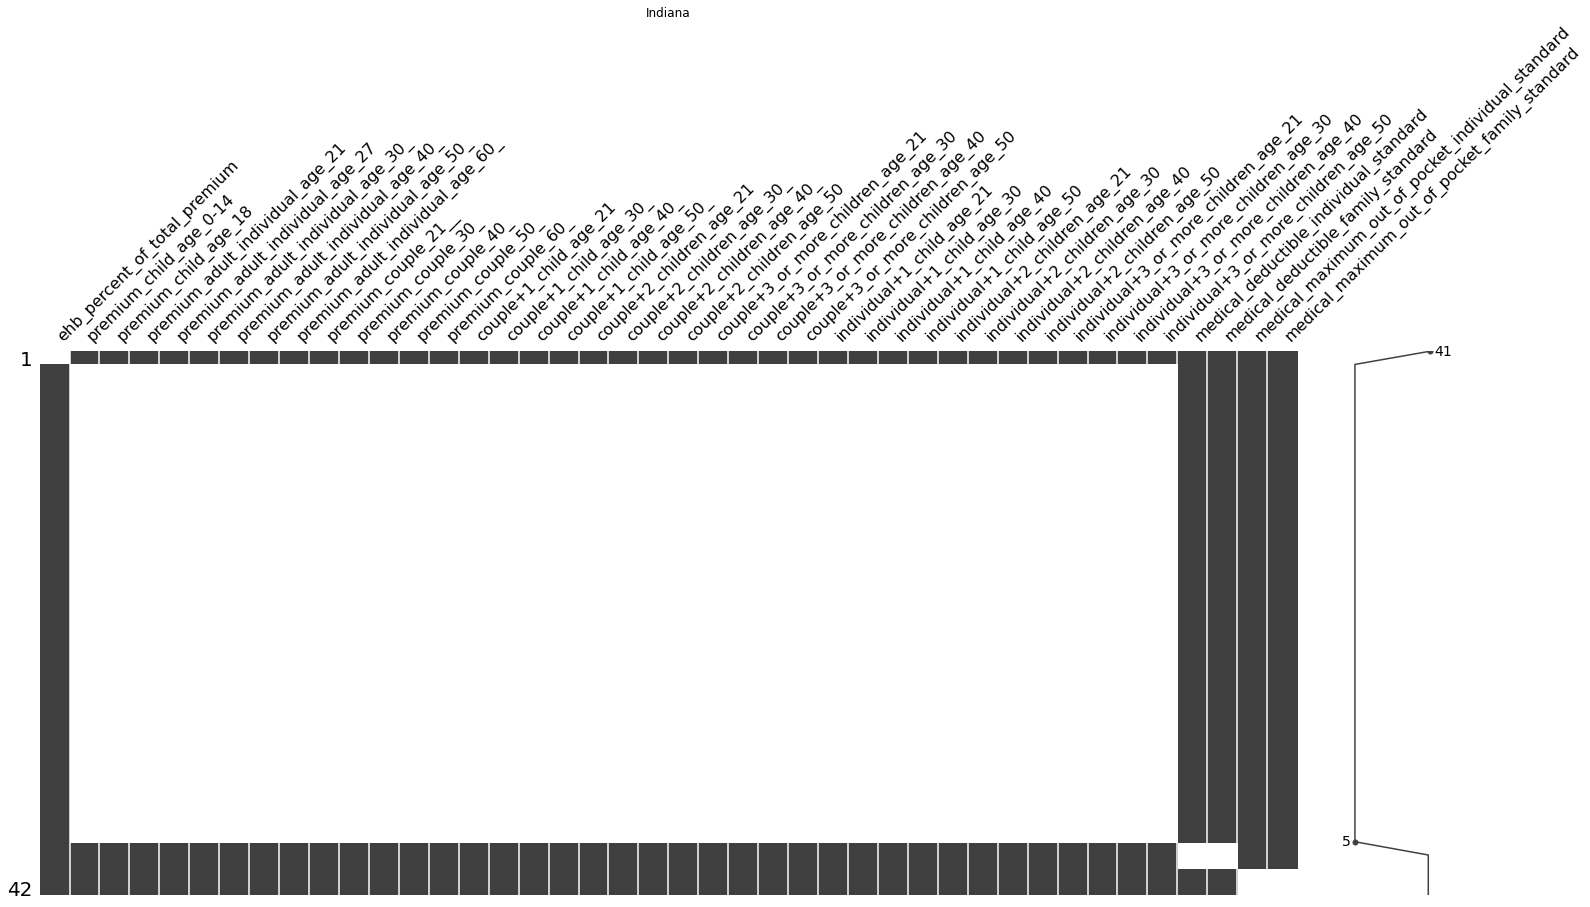

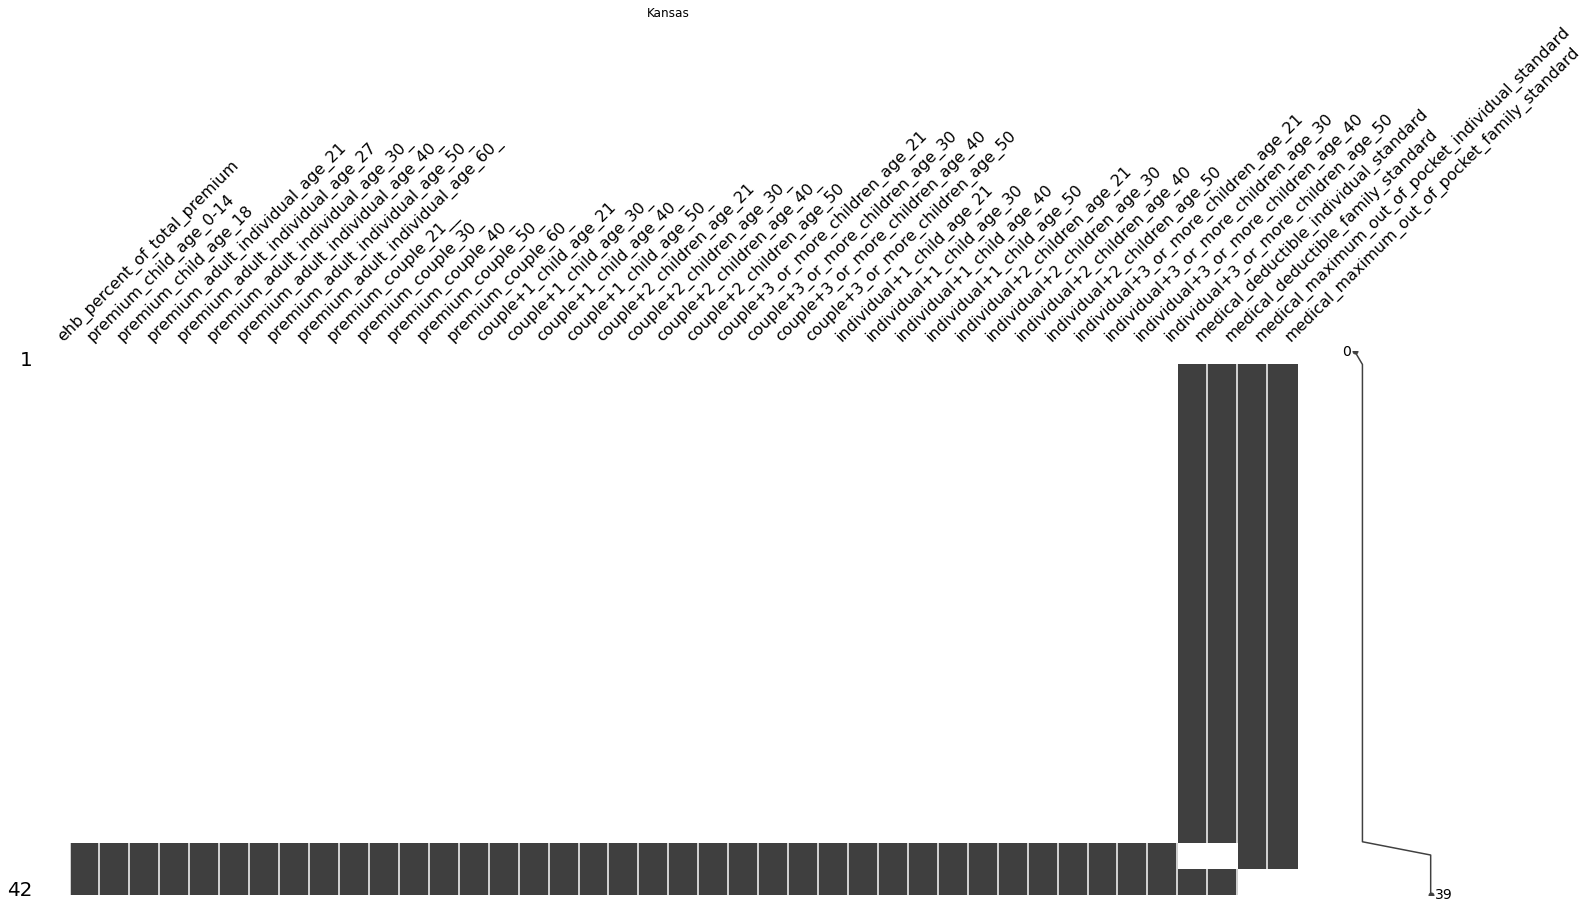

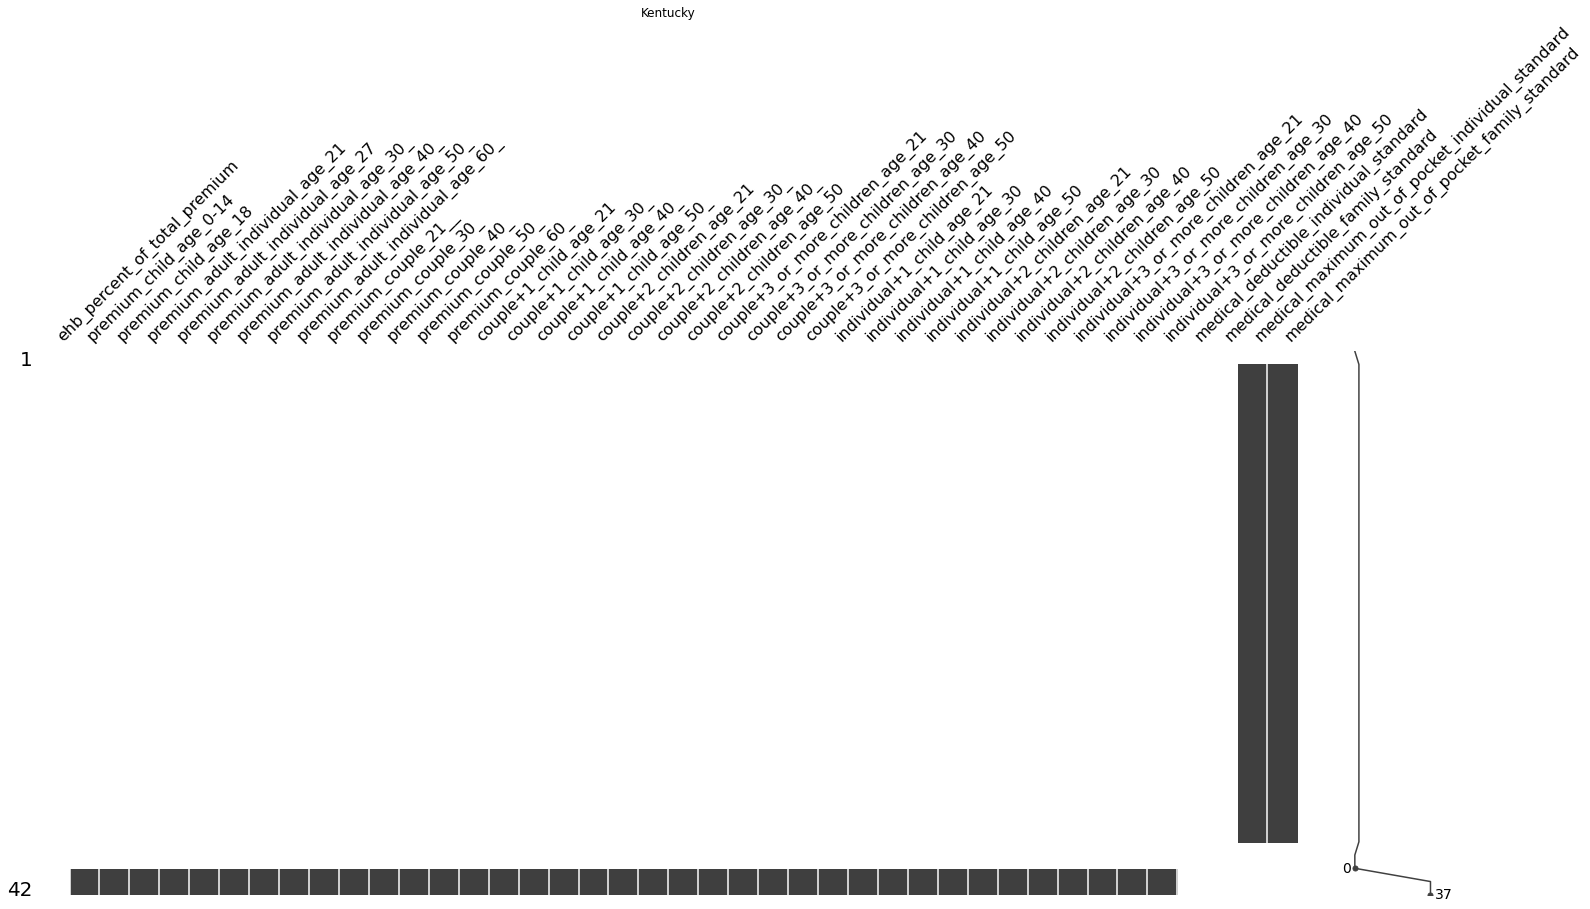

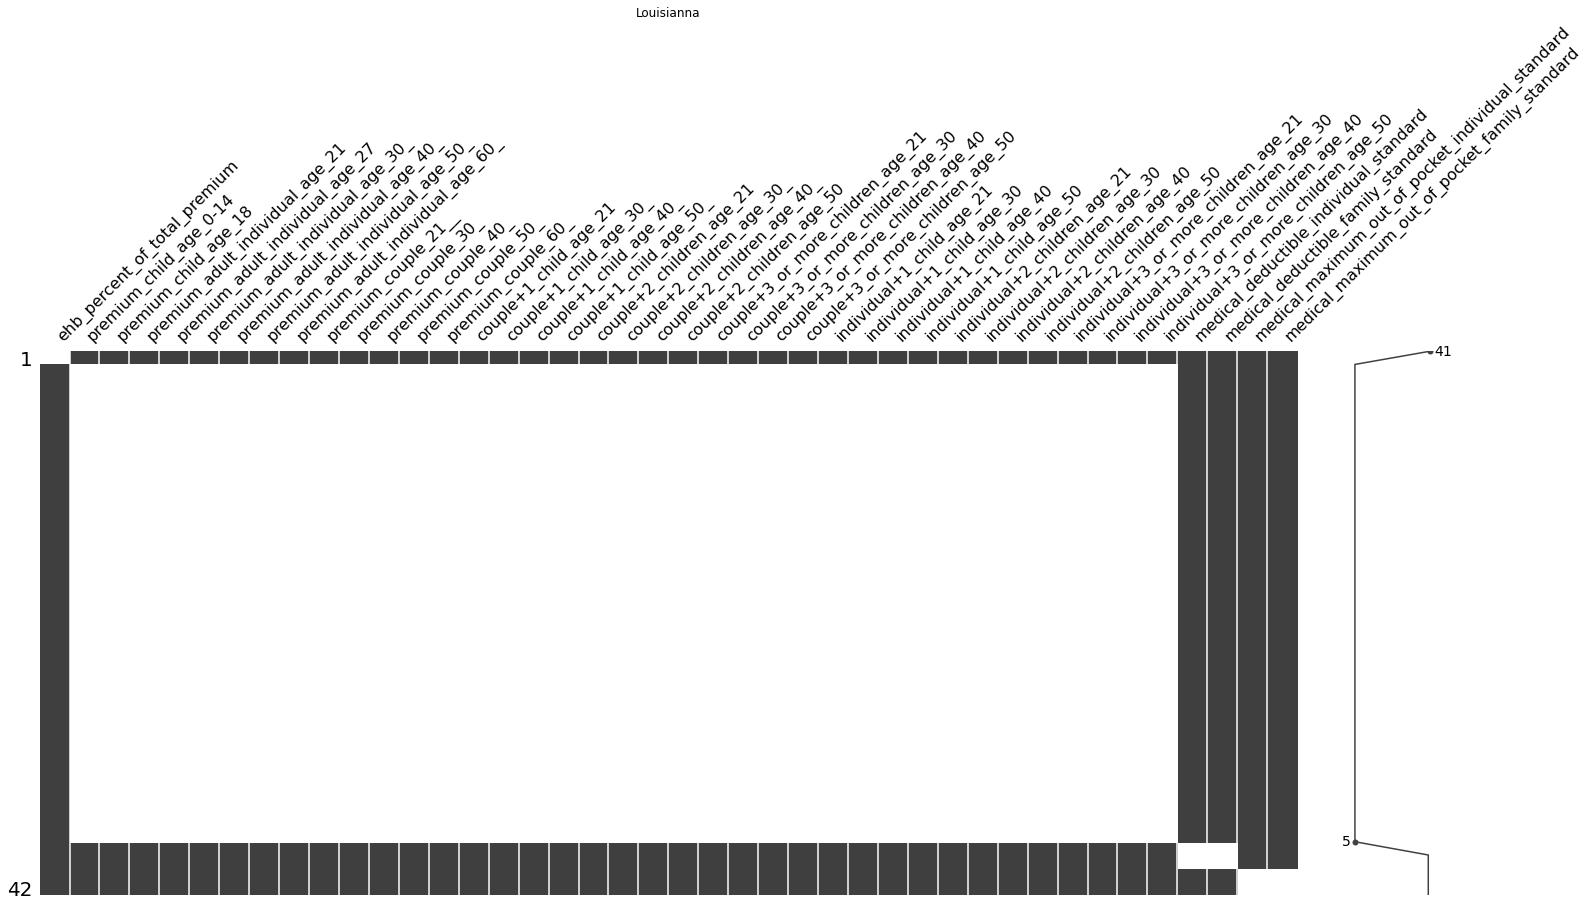

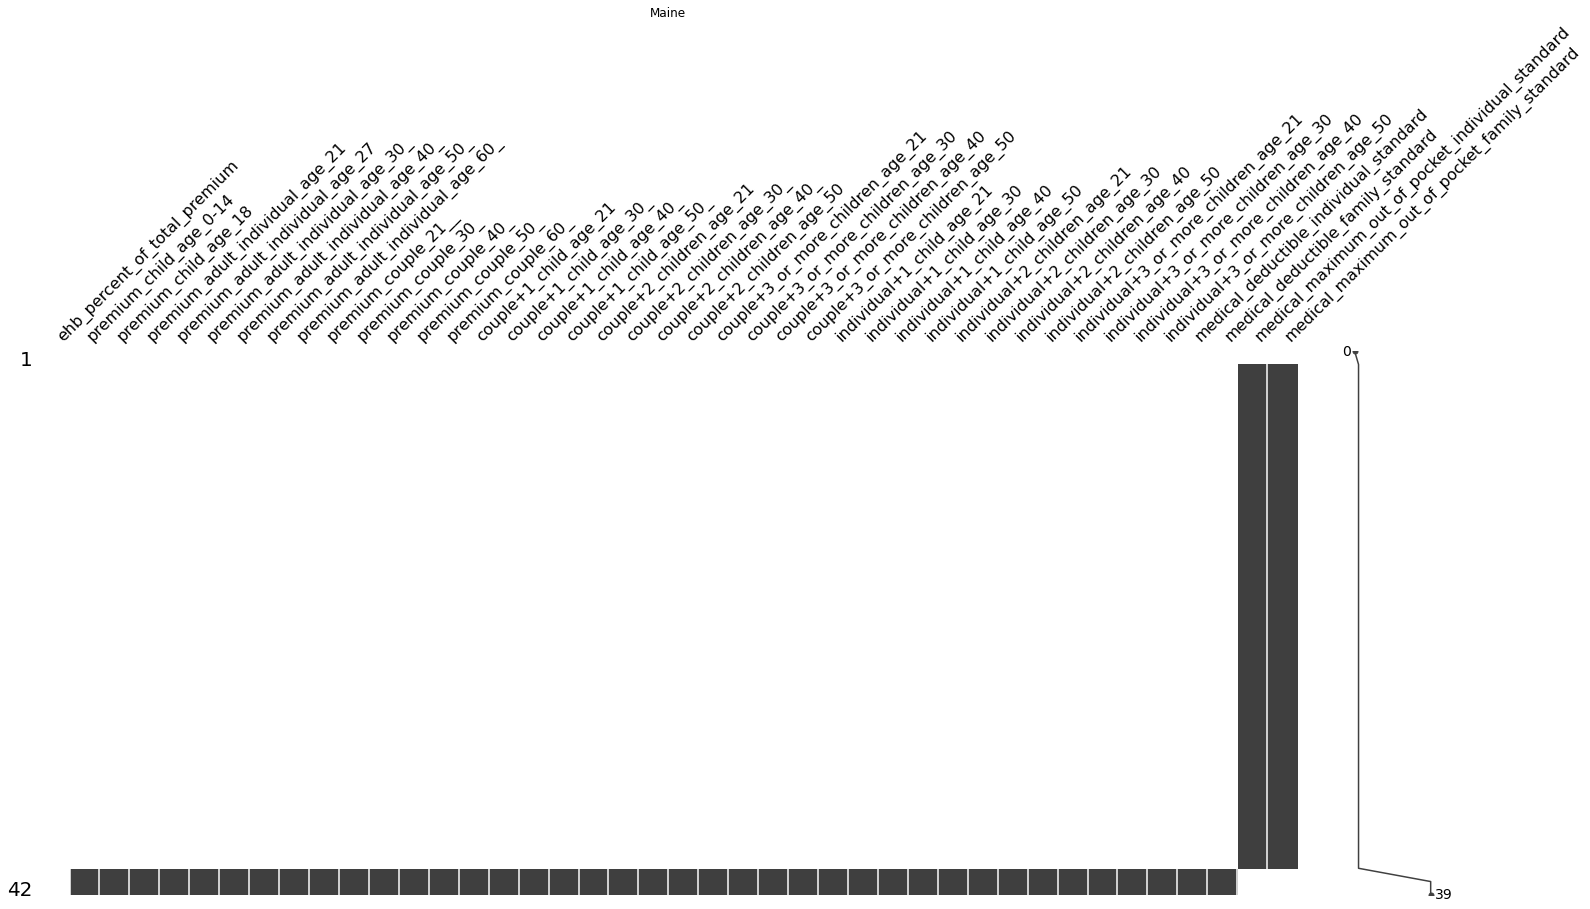

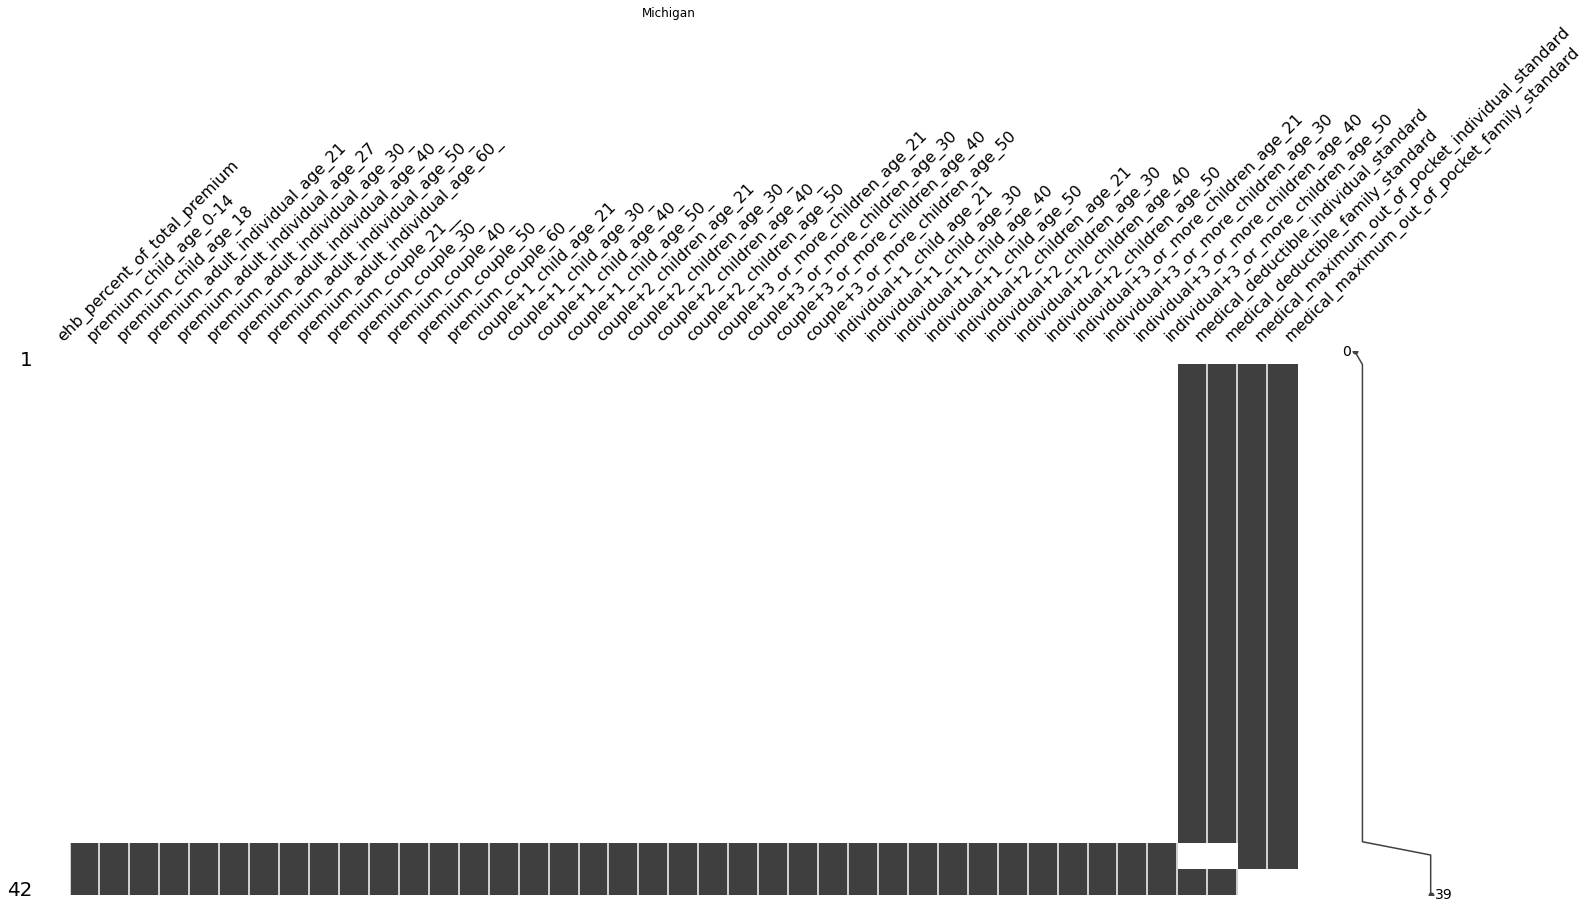

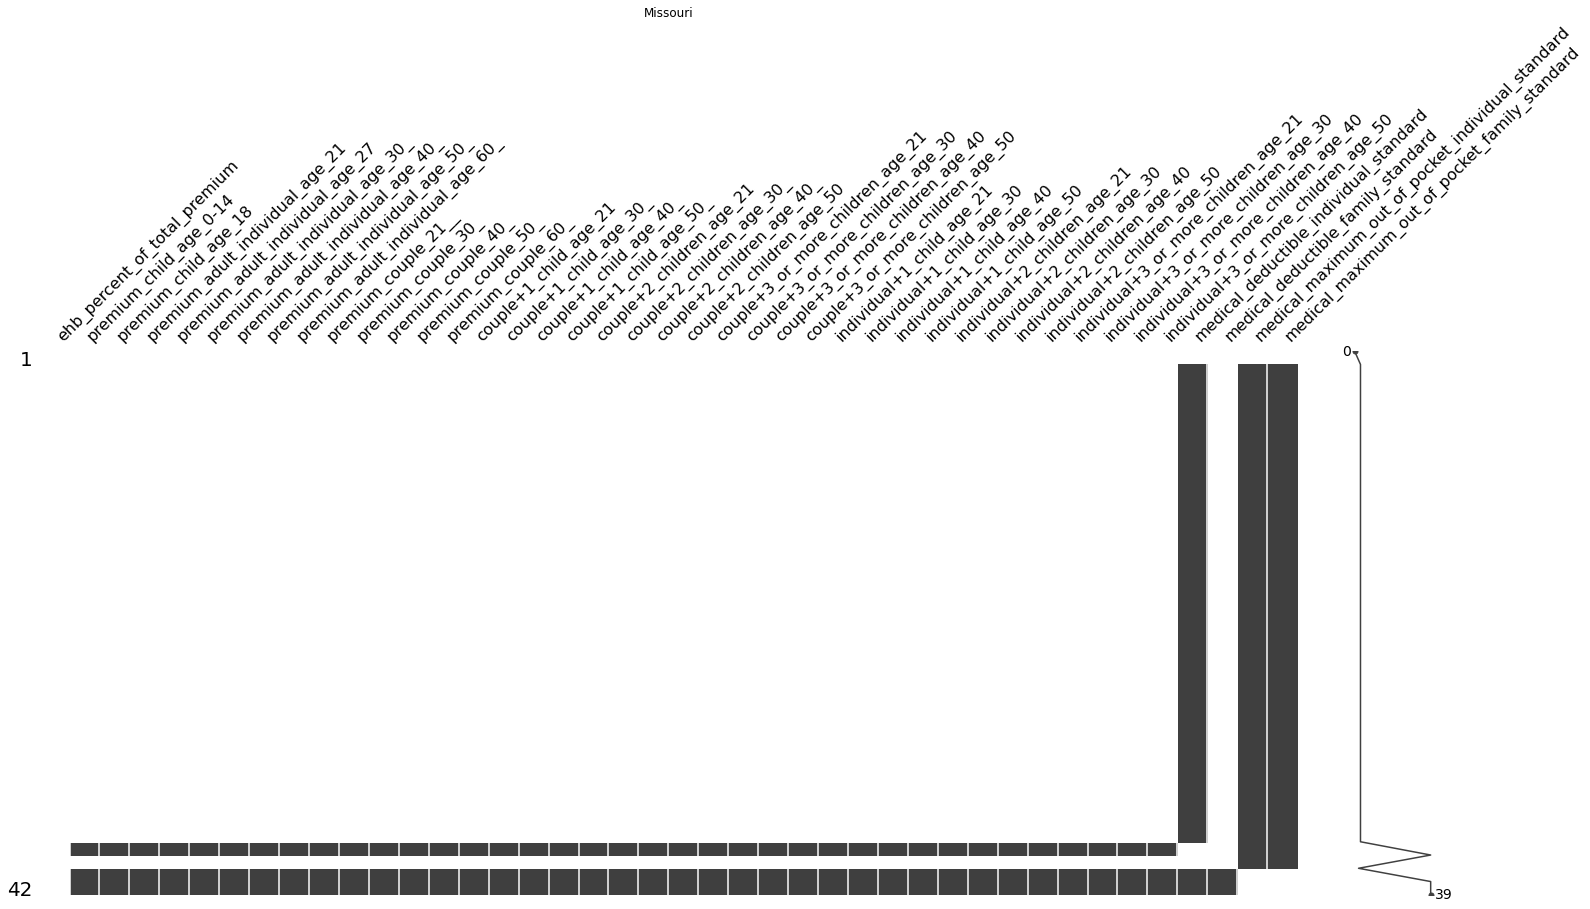

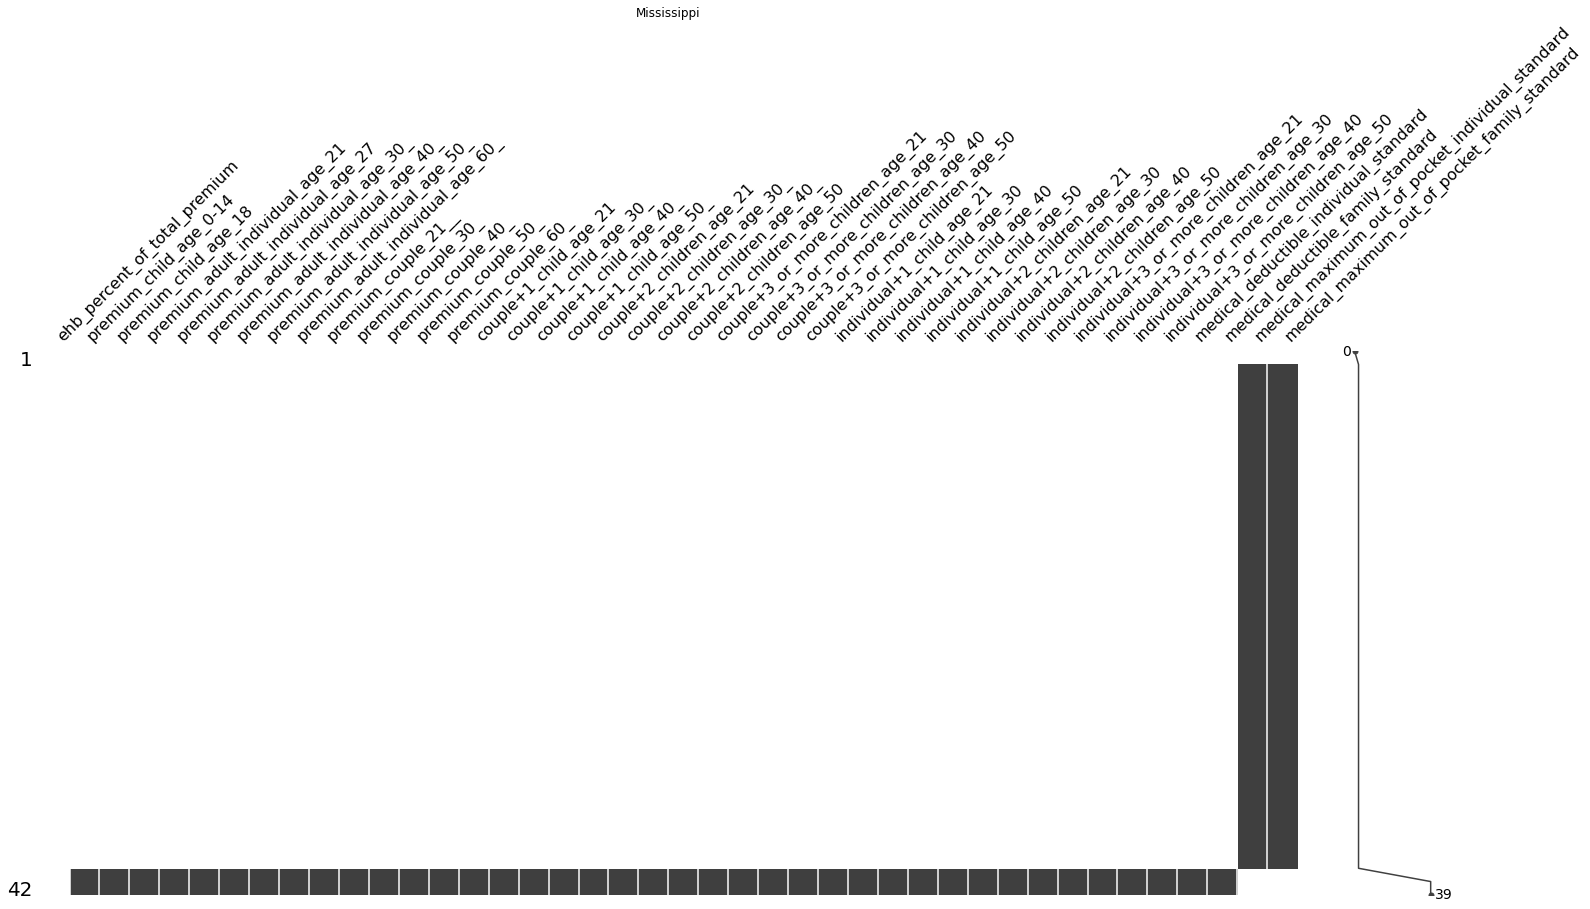

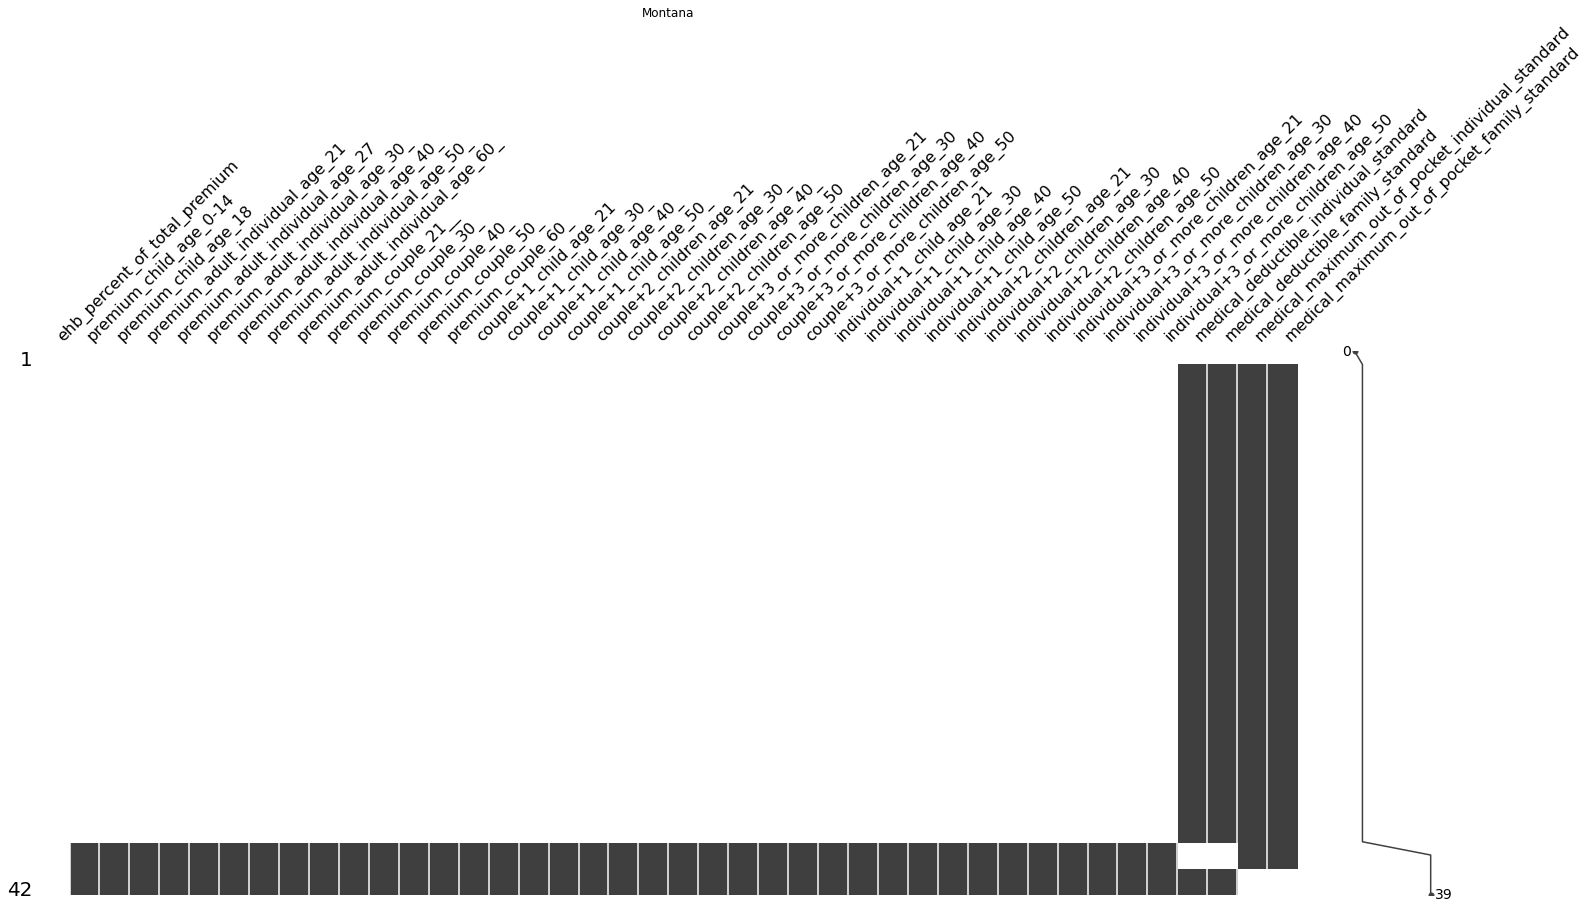

In [29]:
# Look at correlation values at the state level; see if the r-values are different
for state in plans_df.state.unique().tolist()[0:20]:
    temp_df = plans_df[plans_df.state==state]
    temp_df = temp_df.corr()
    temp_df = temp_df[(temp_df < 0.75) & (temp_df > -0.75)]
    msno.matrix(temp_df)
    plt.title(state)

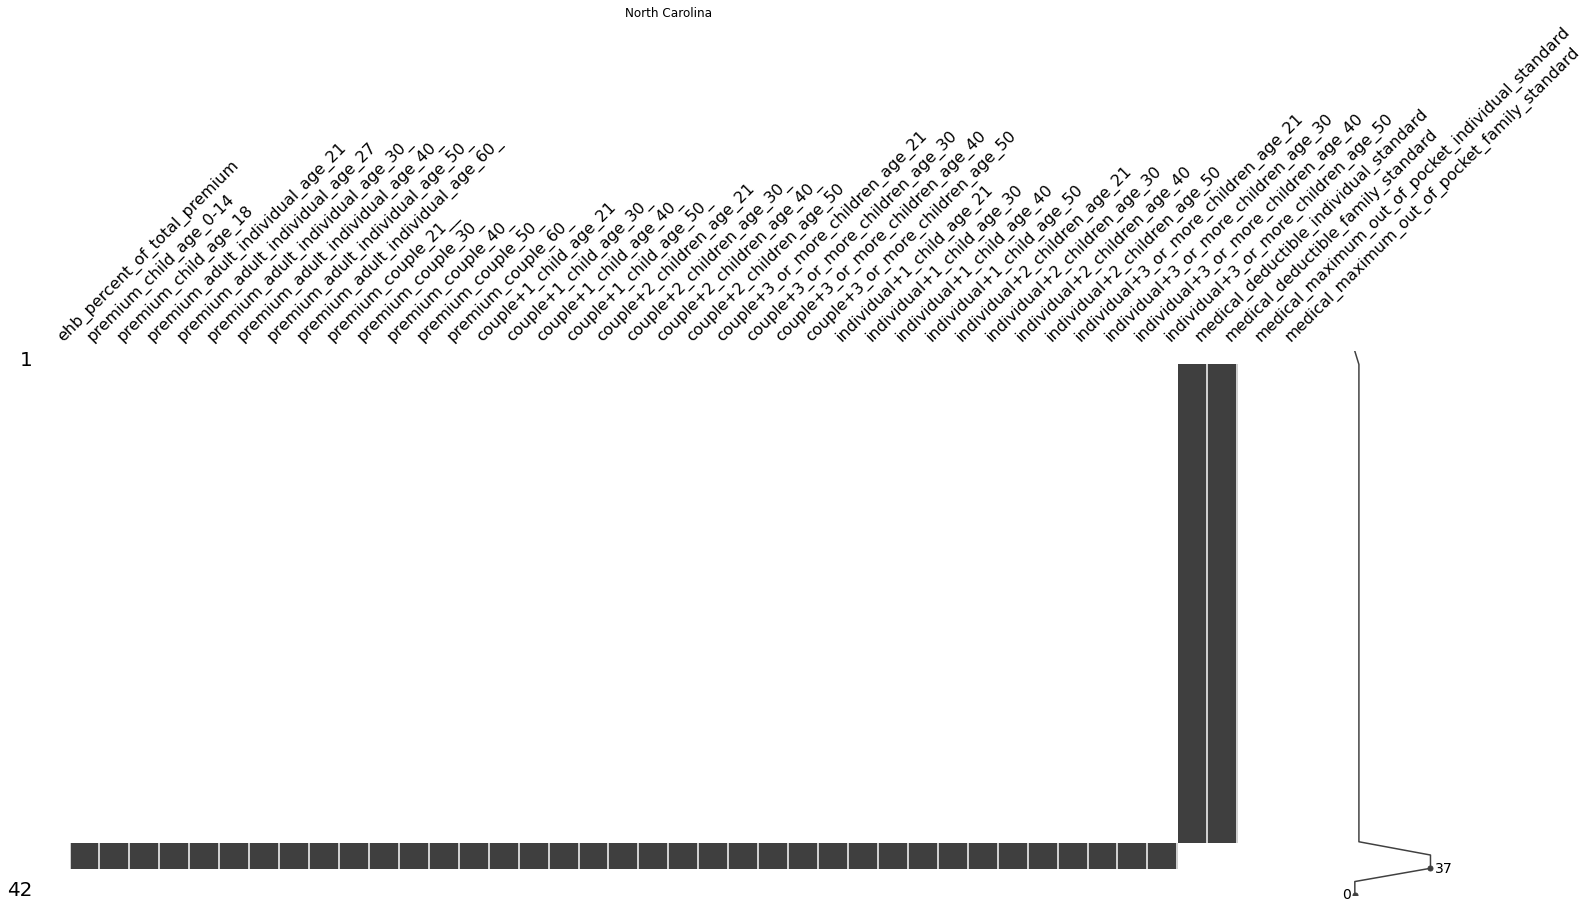

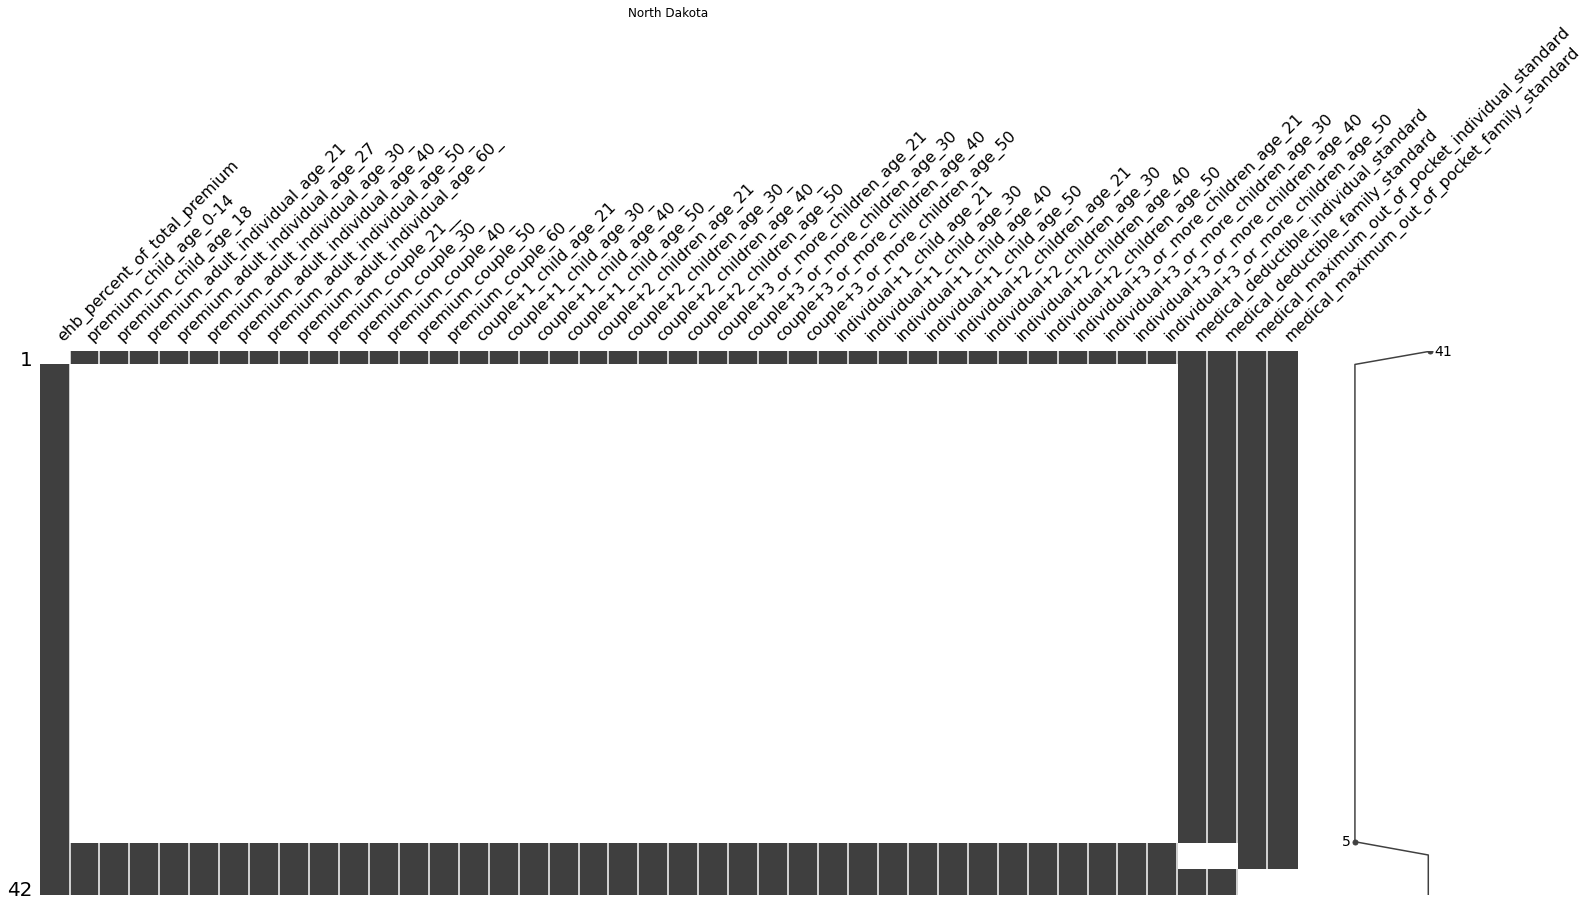

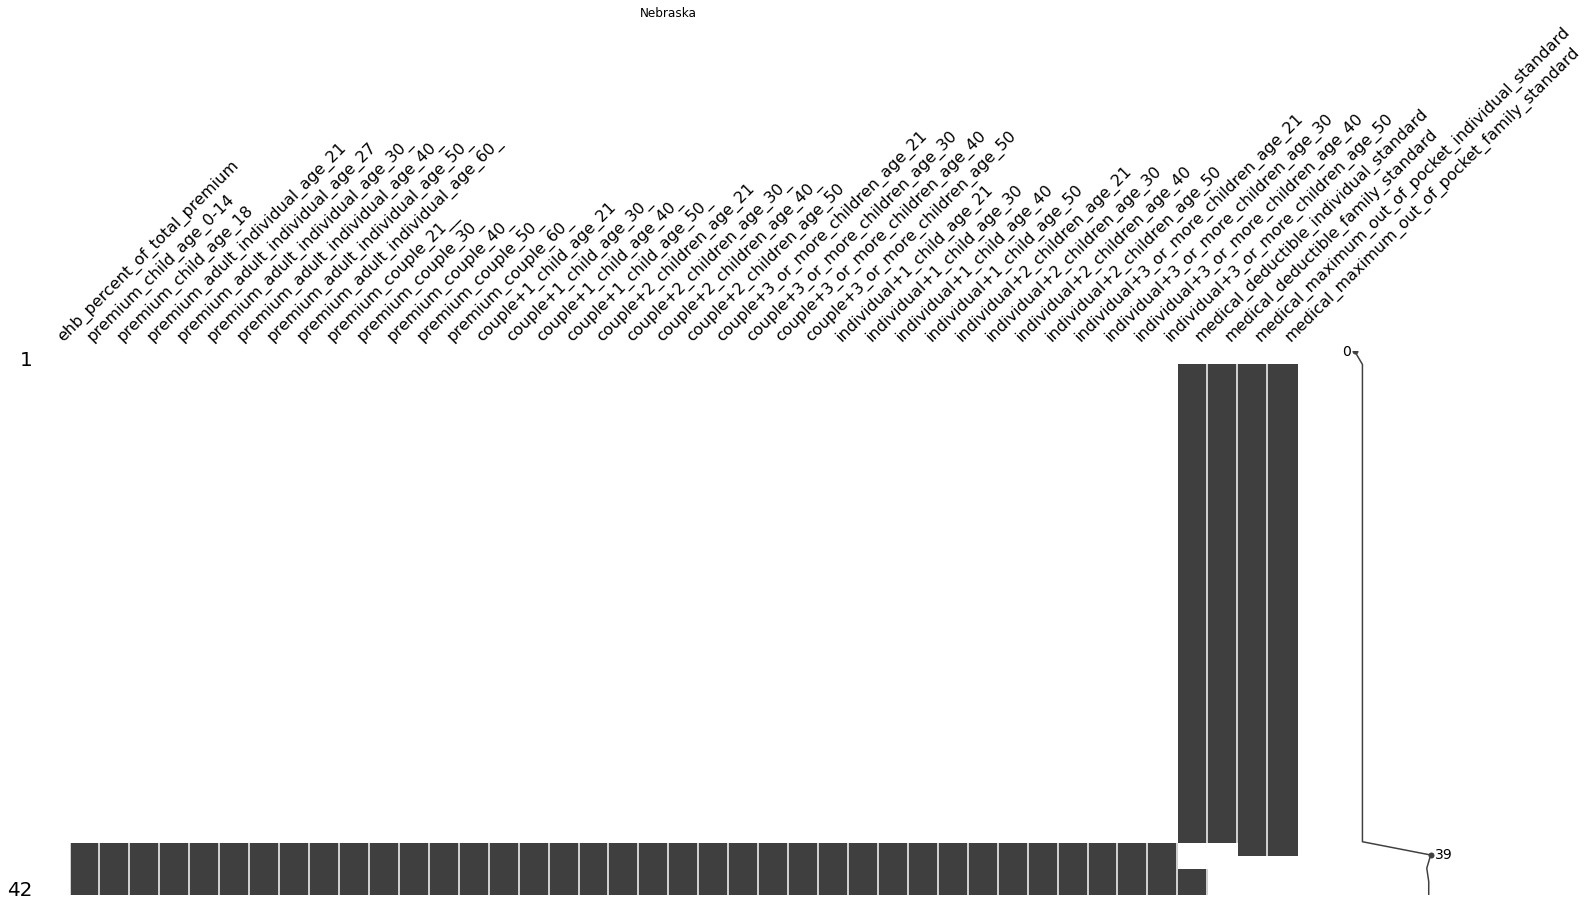

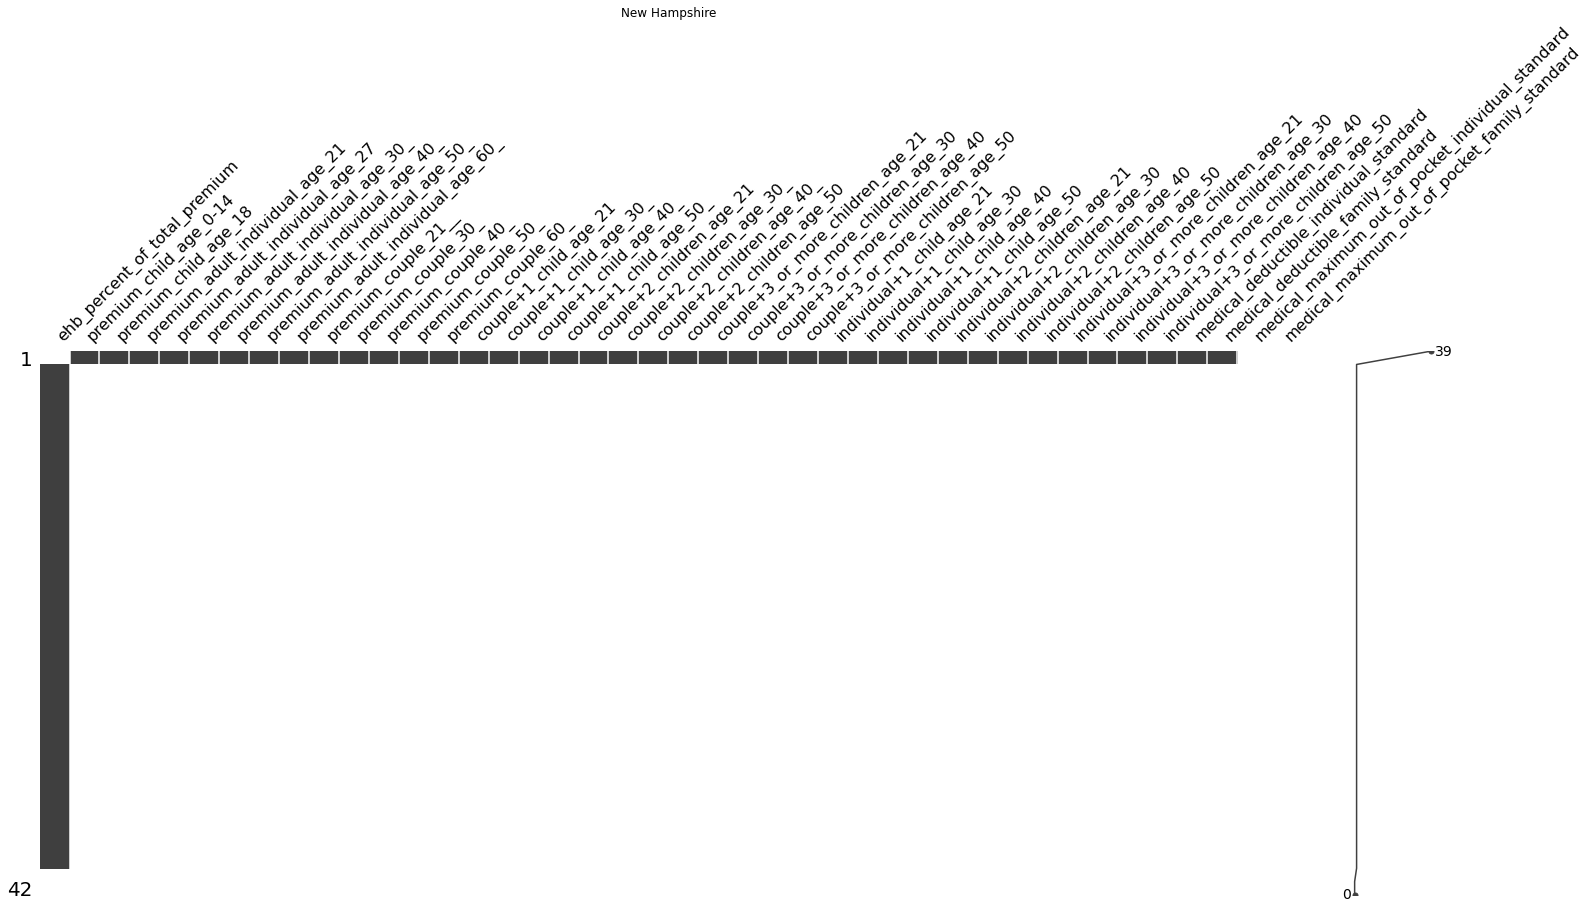

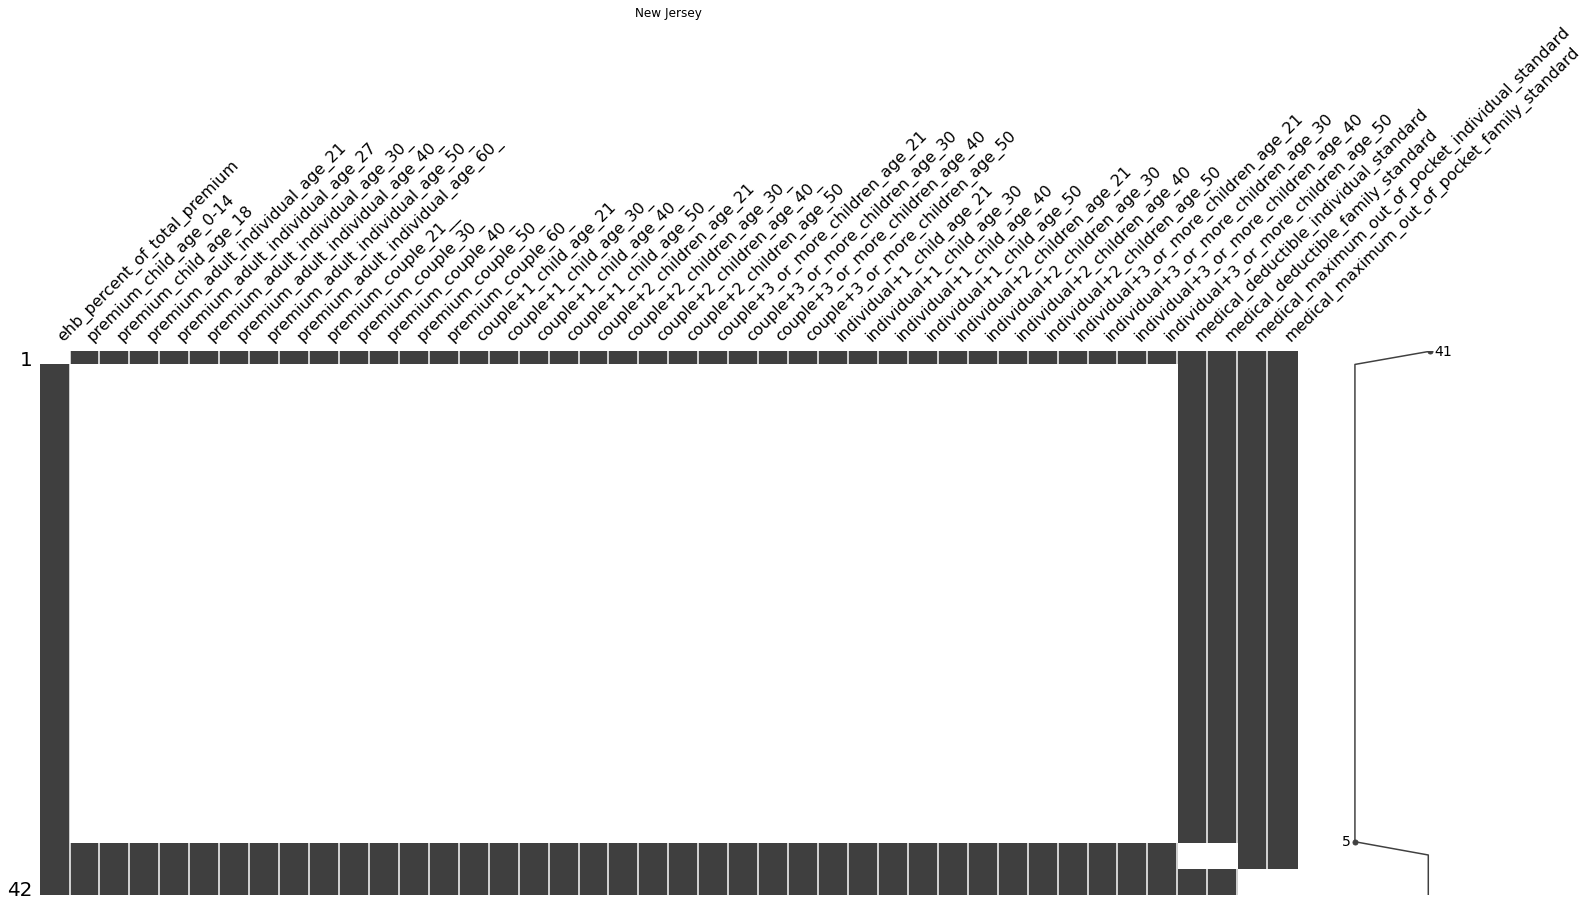

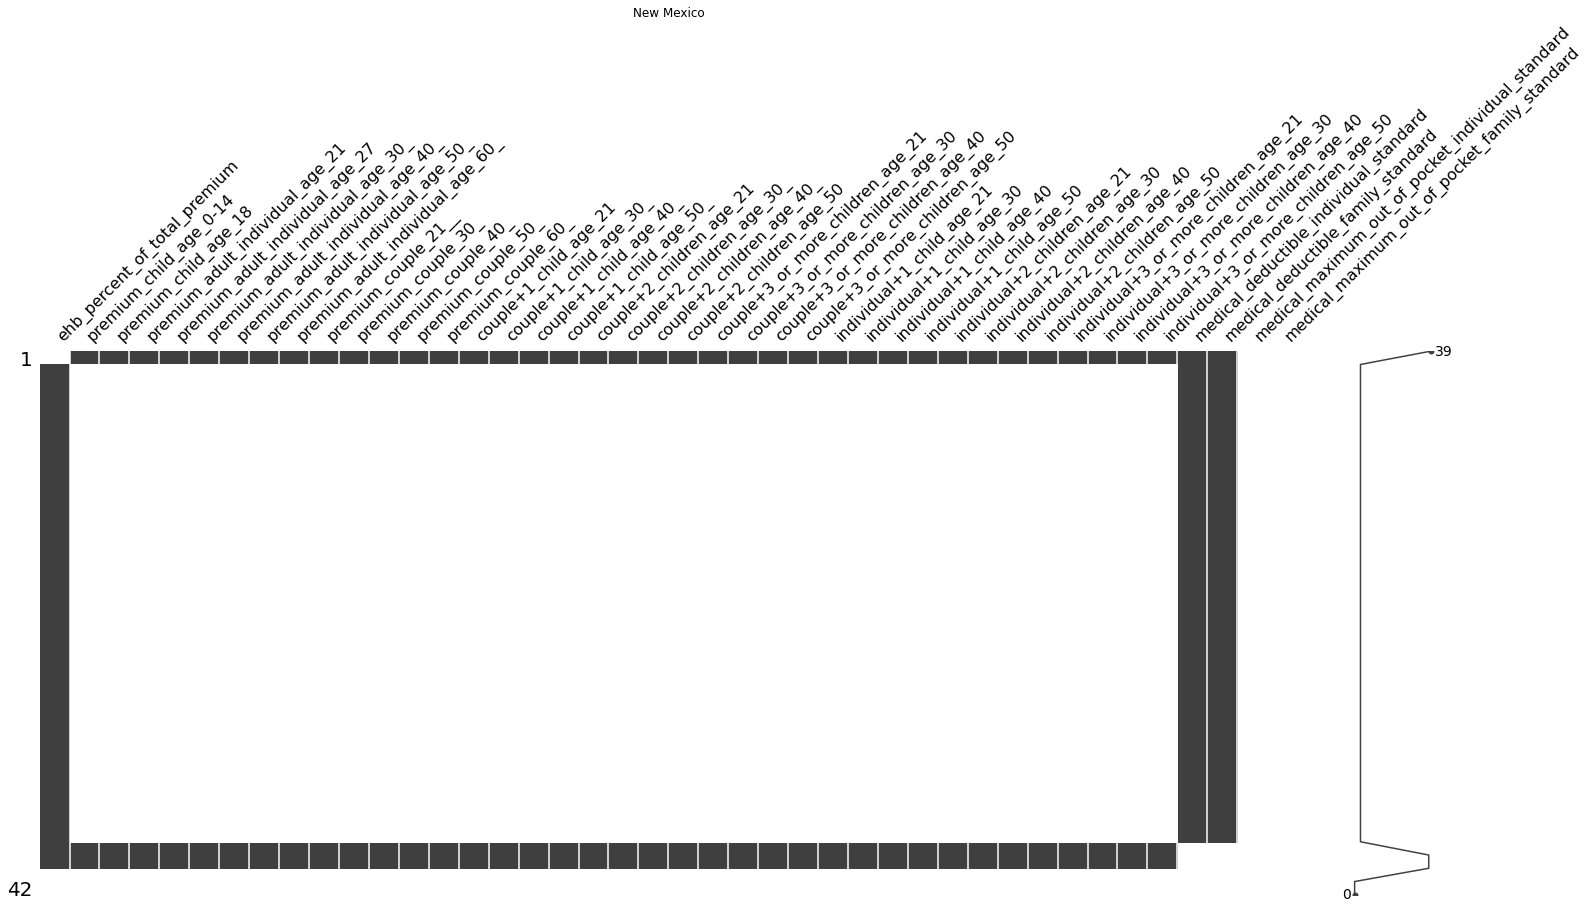

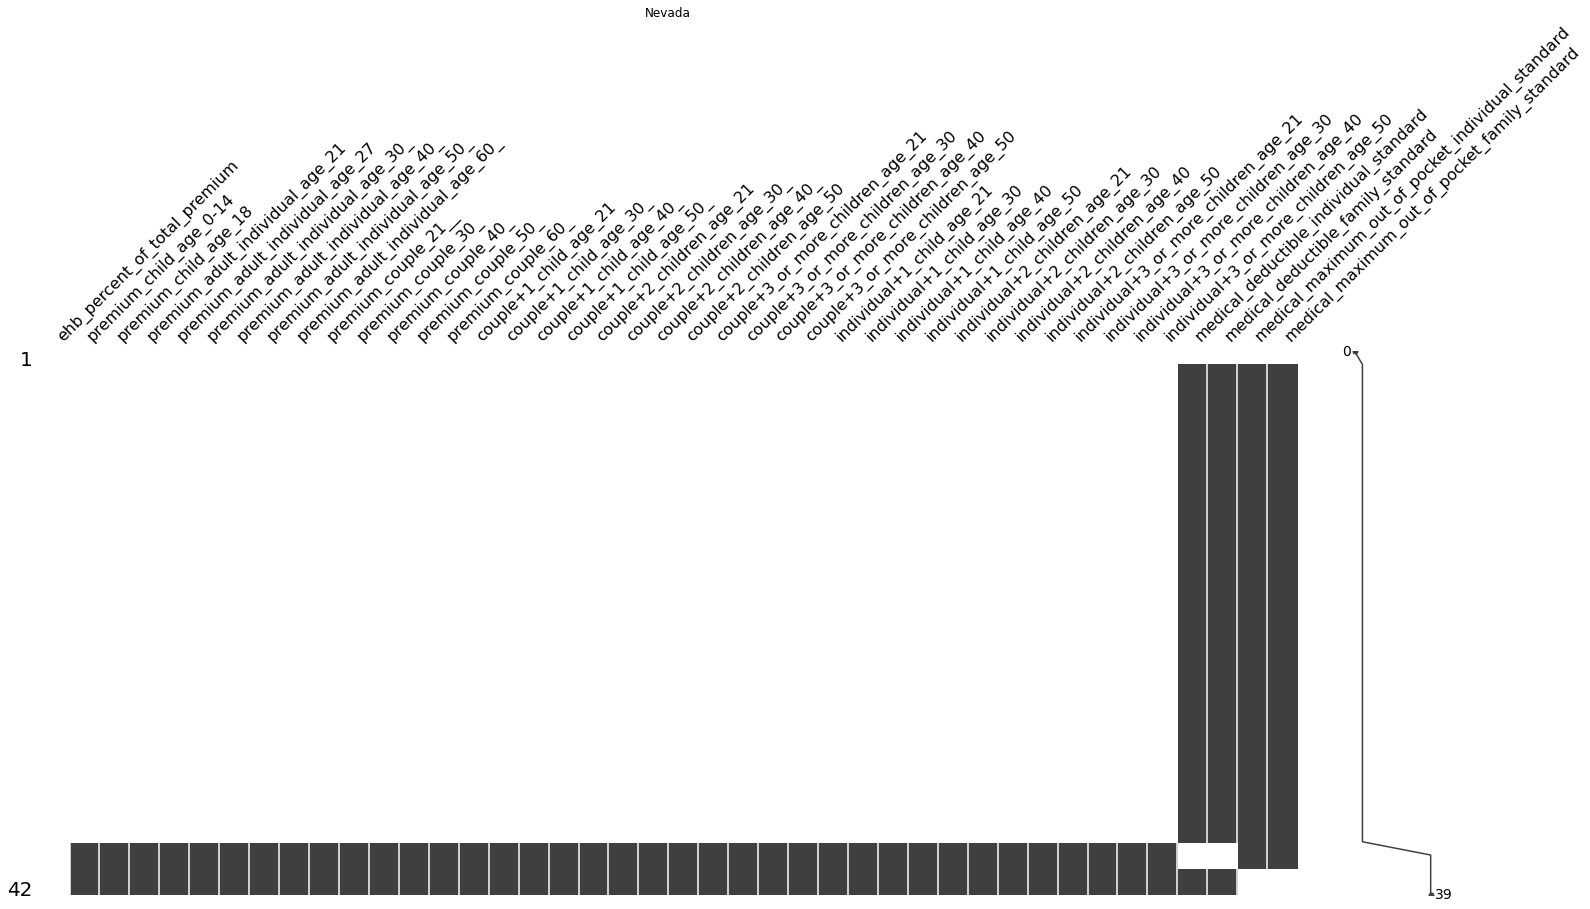

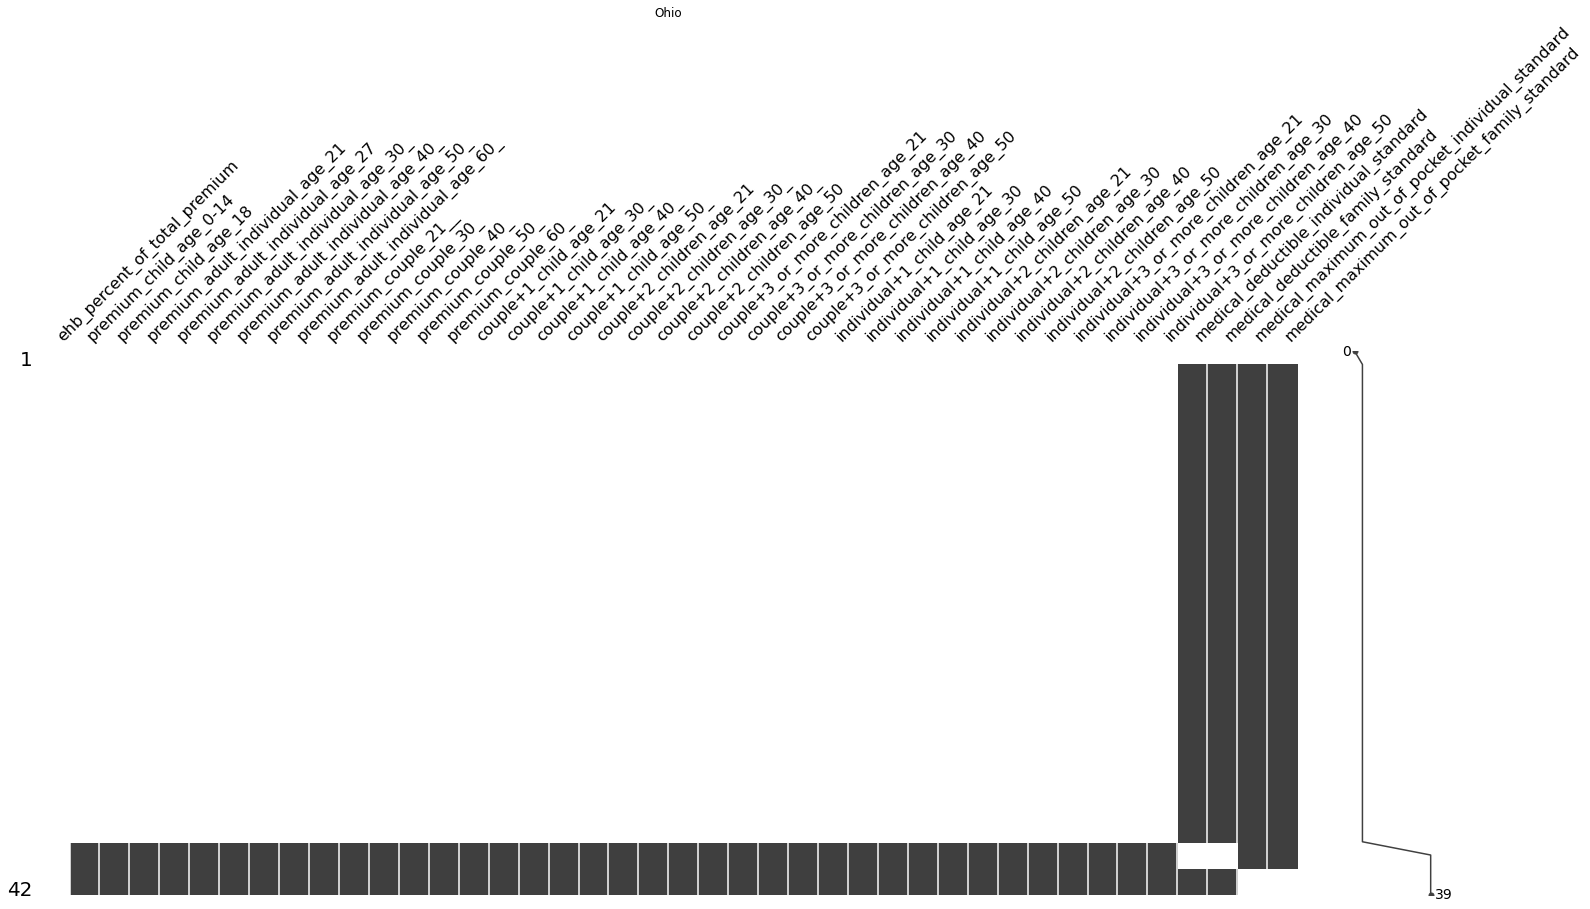

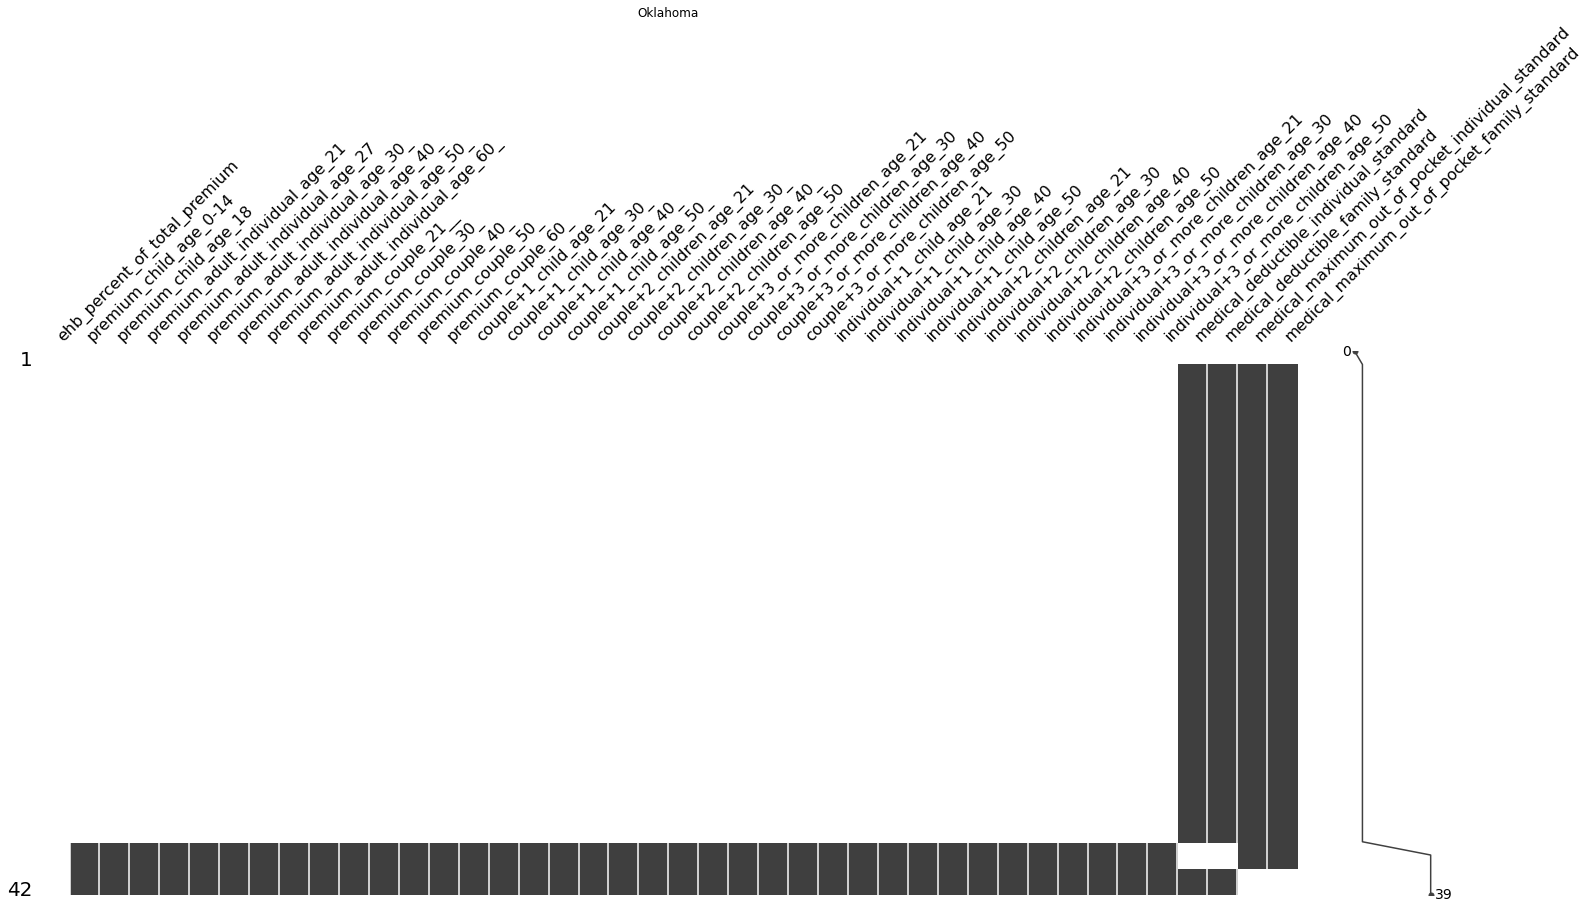

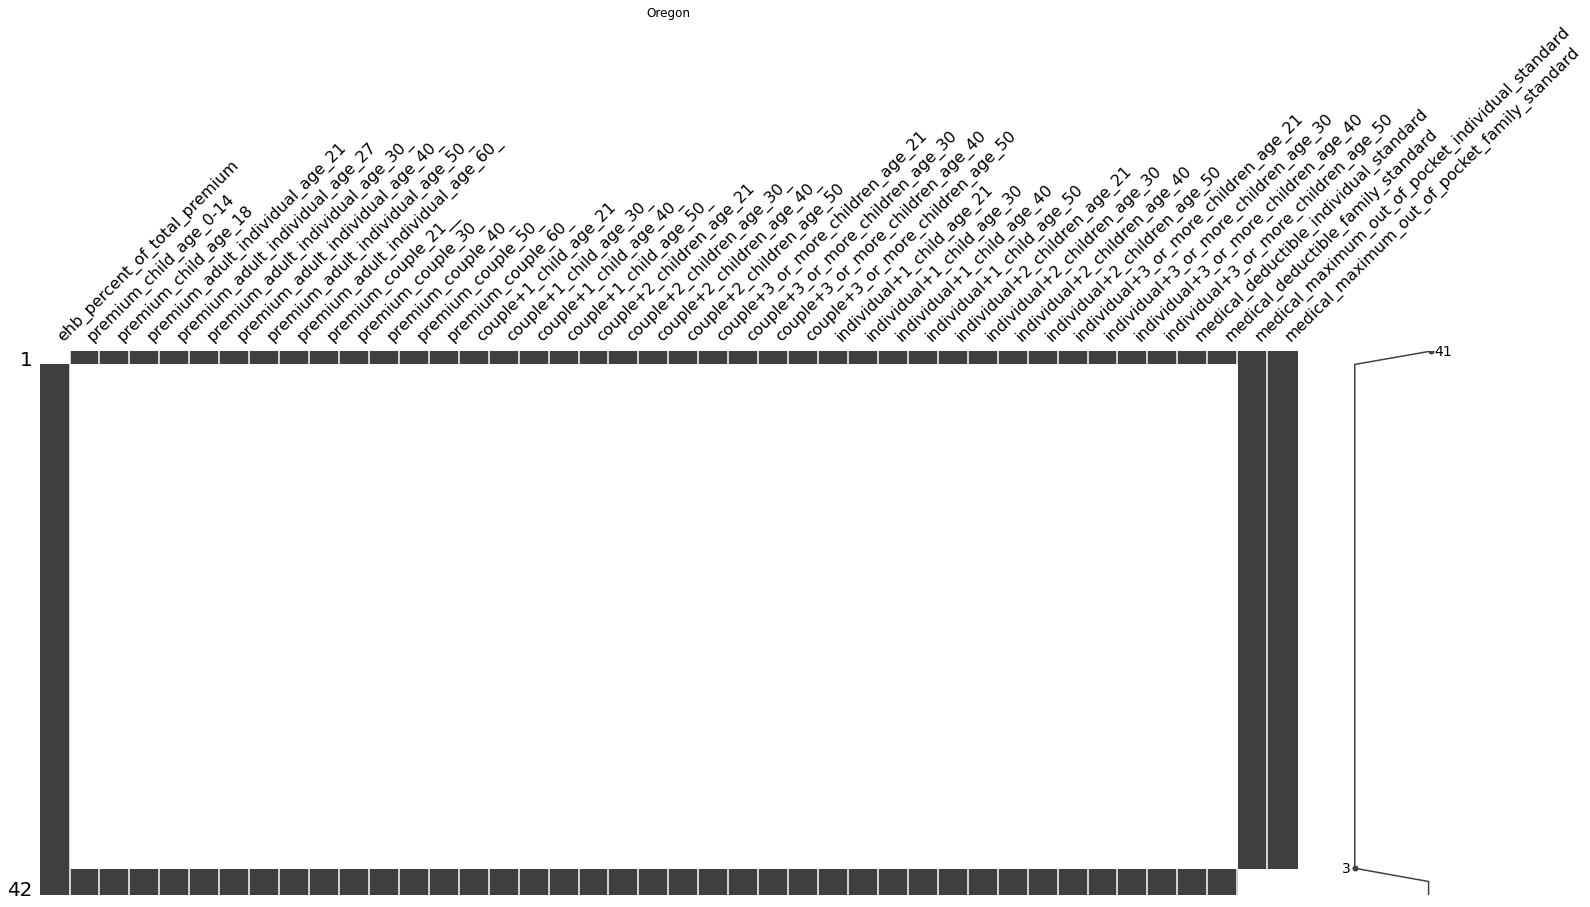

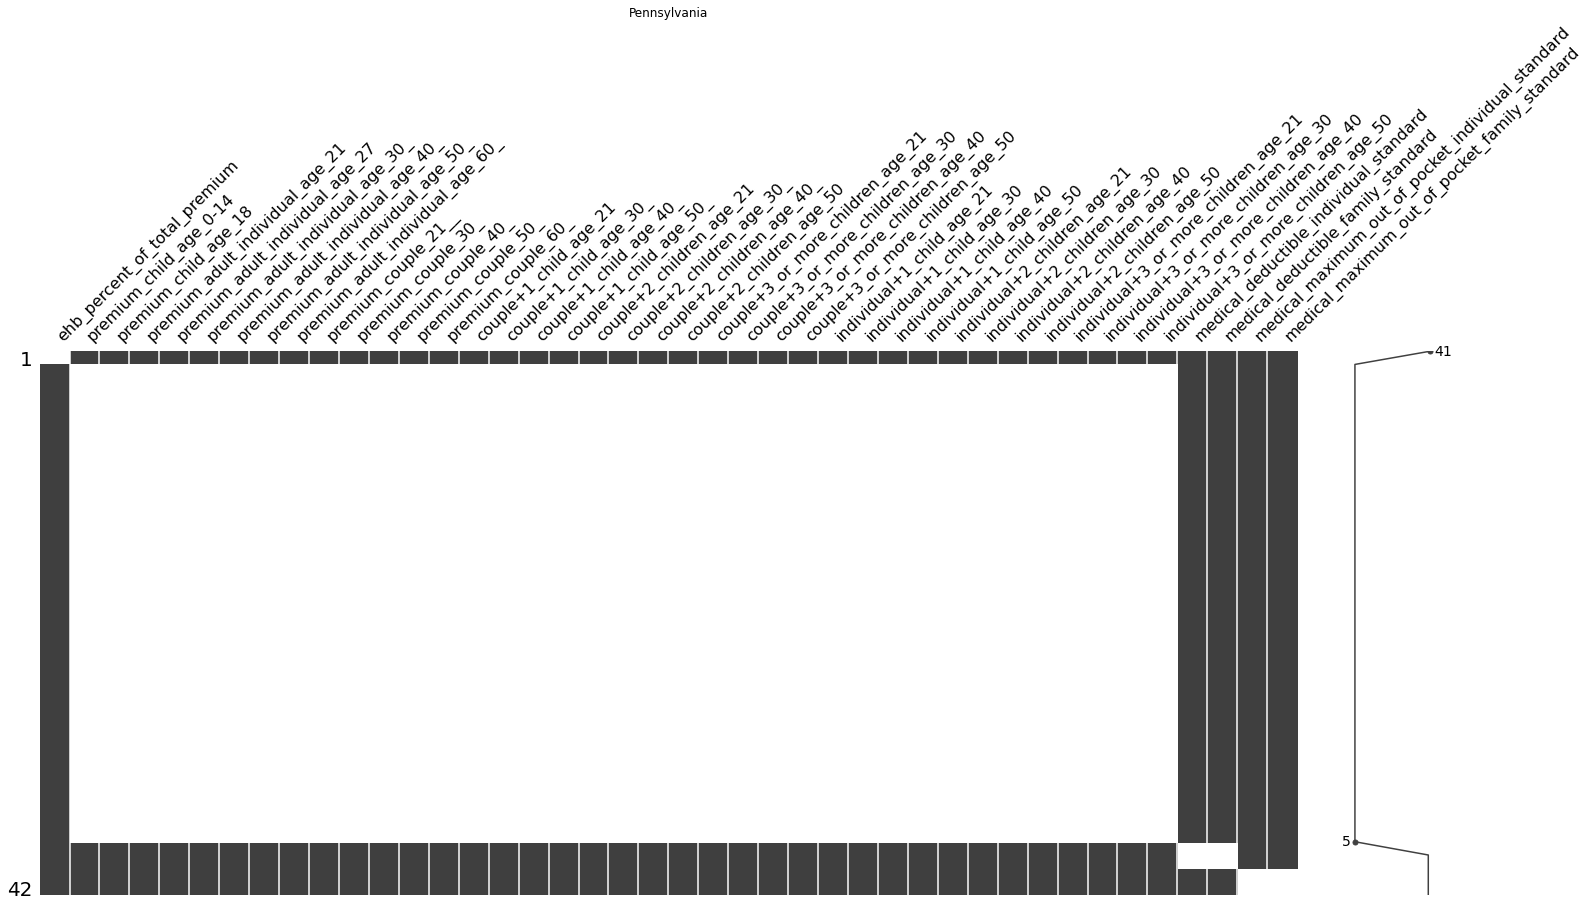

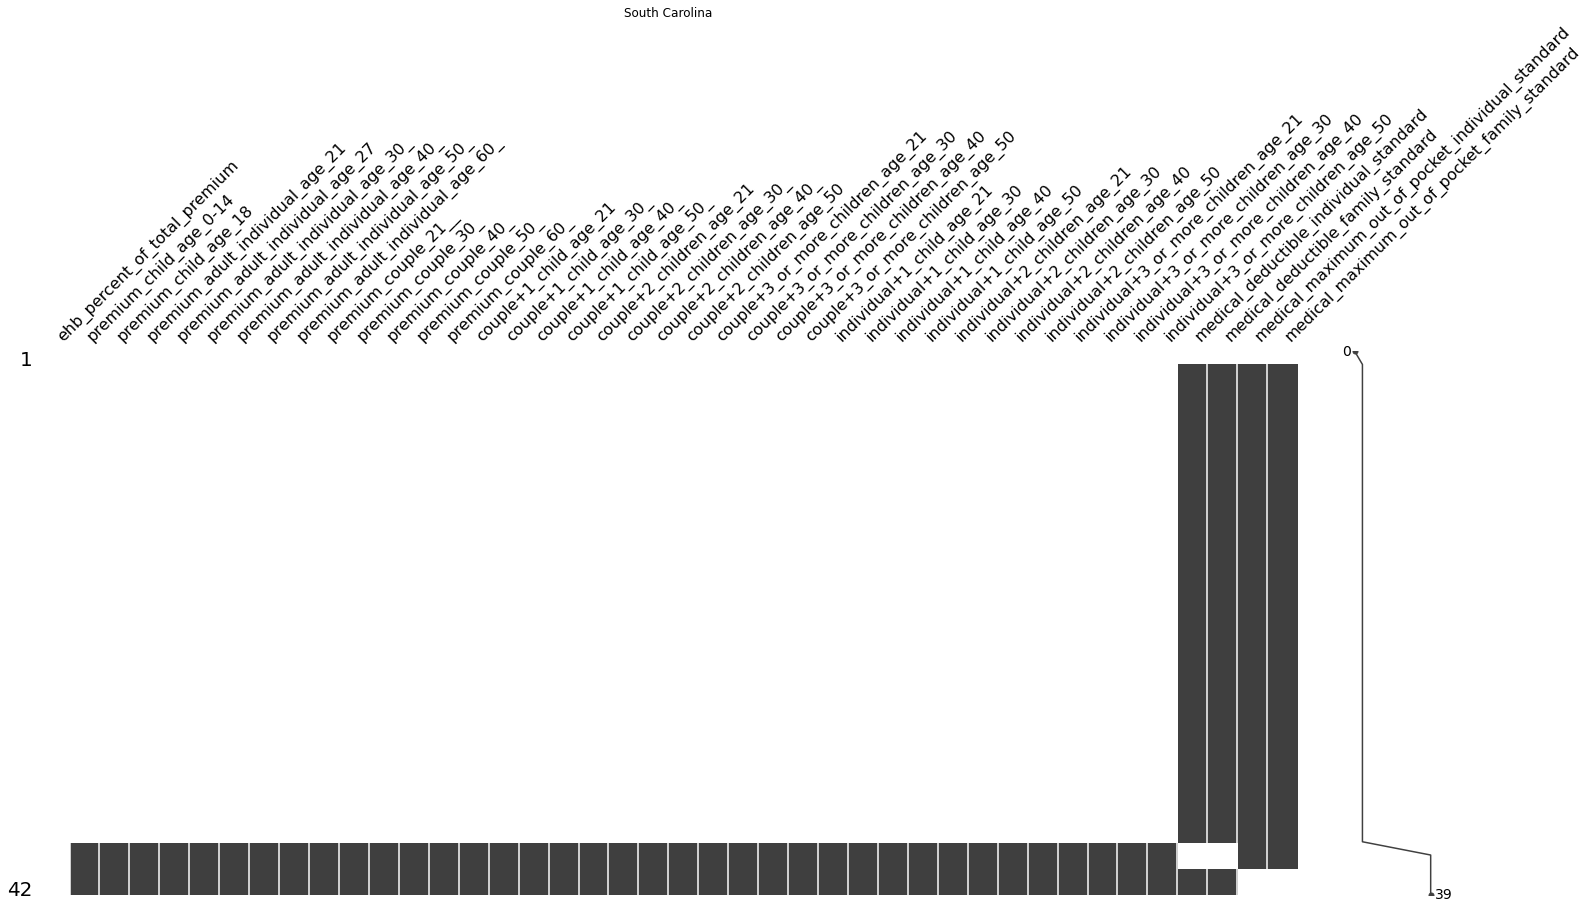

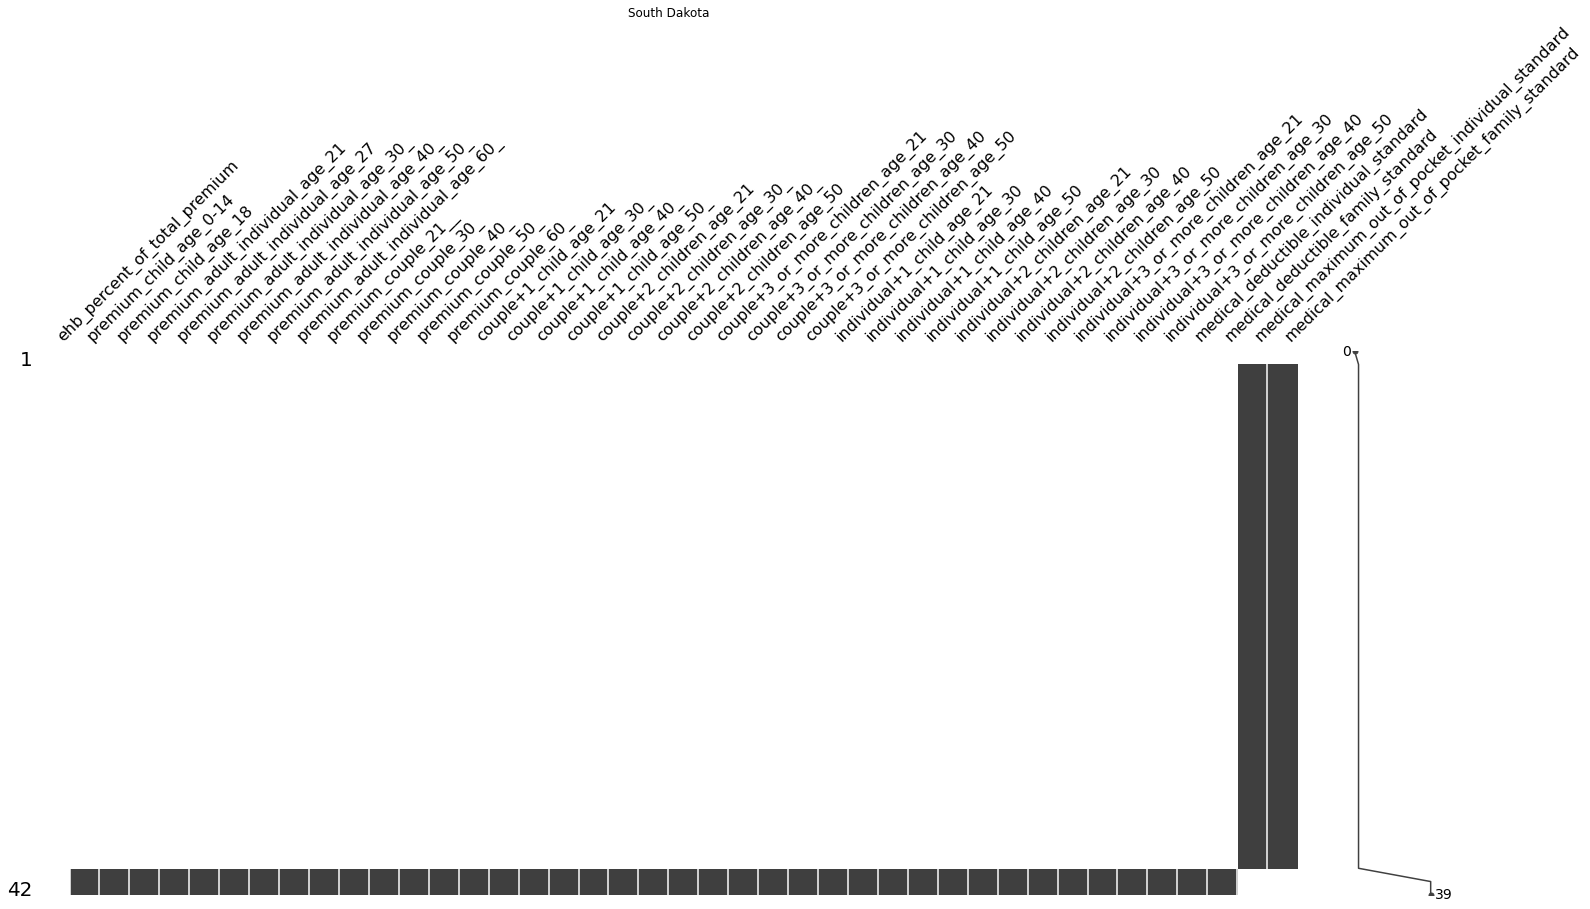

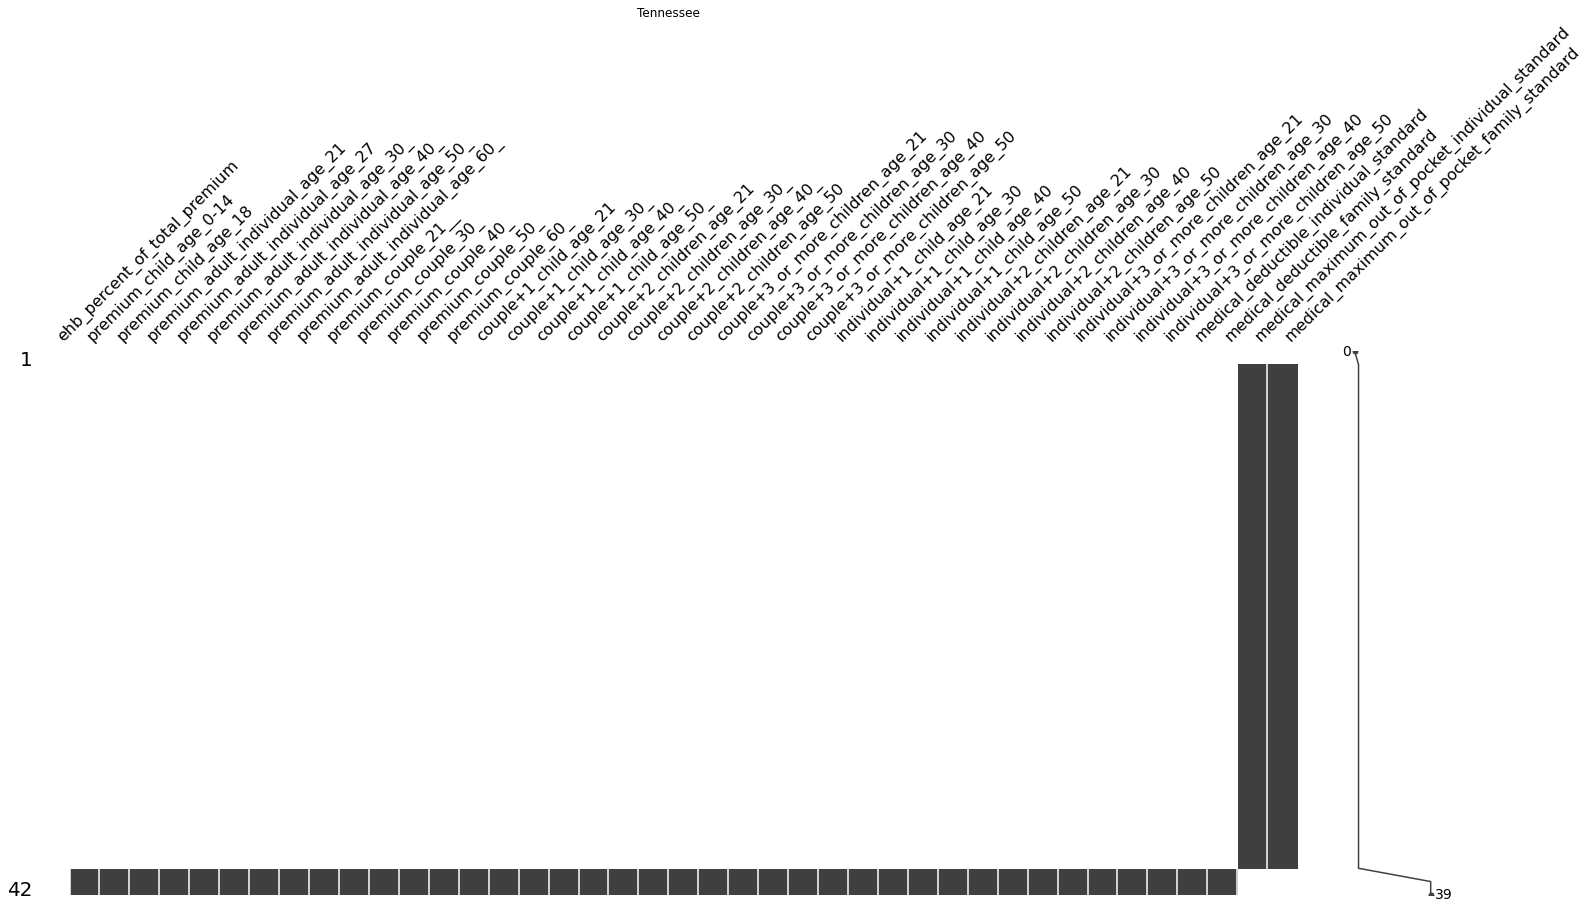

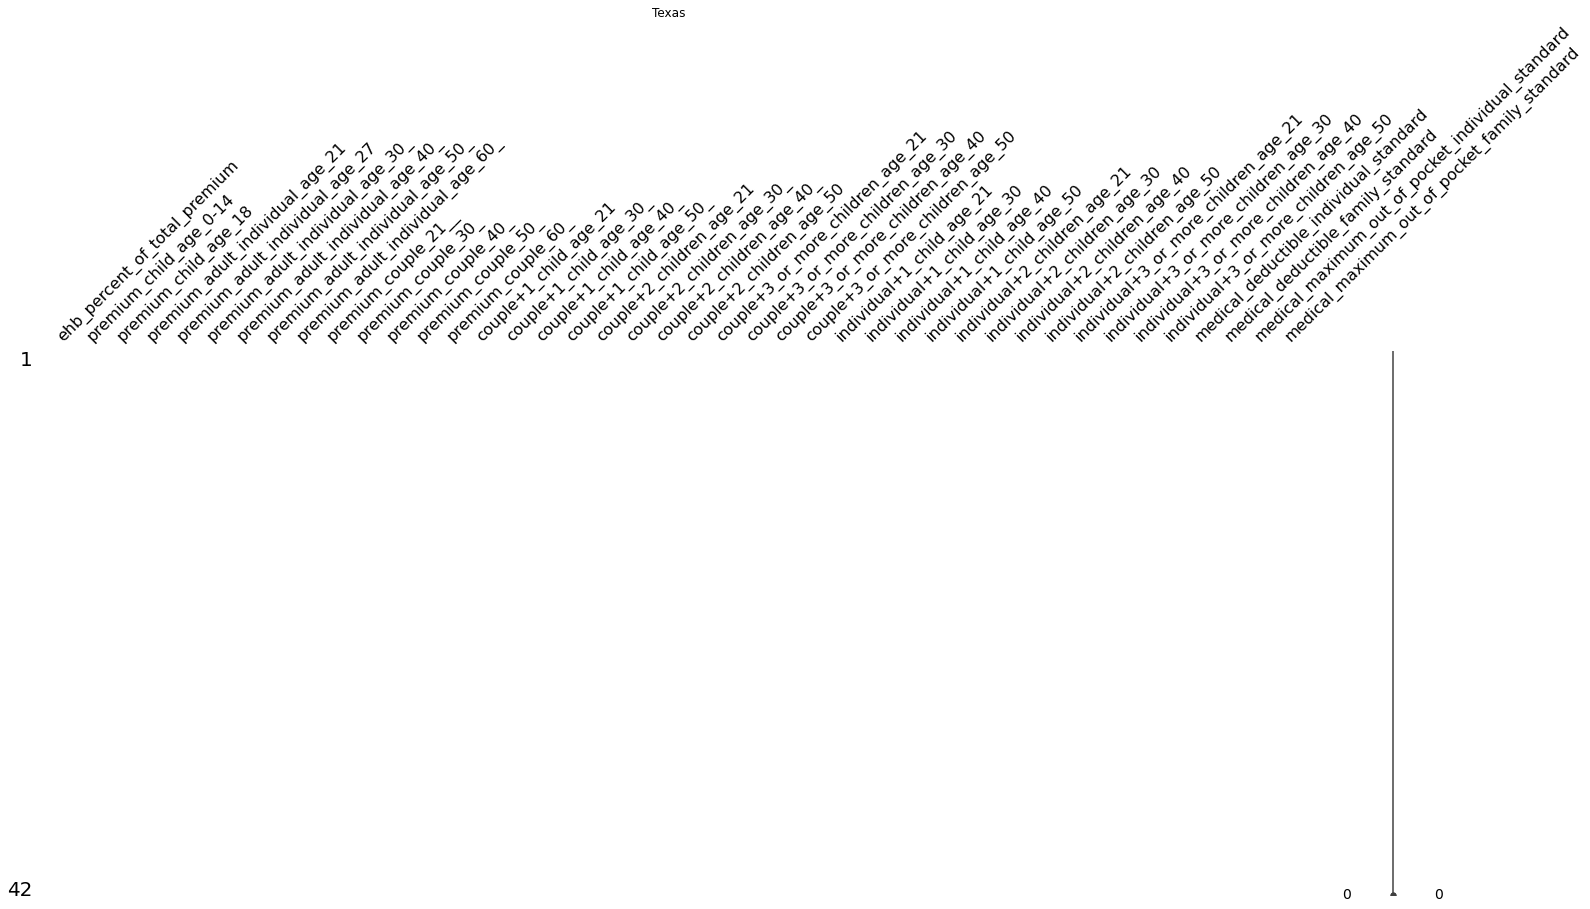

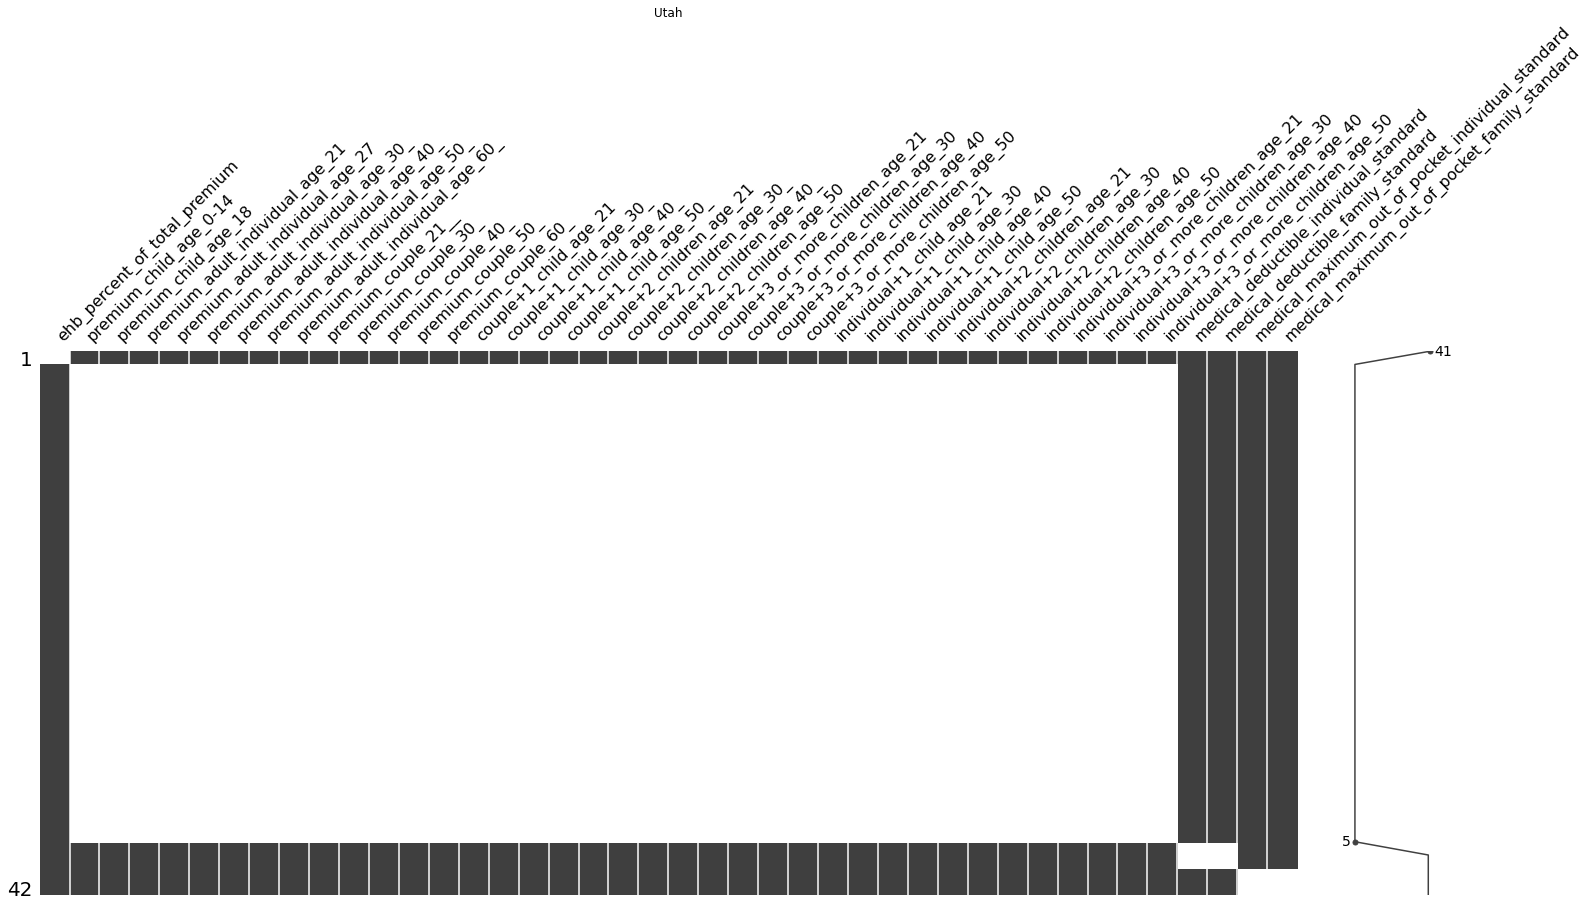

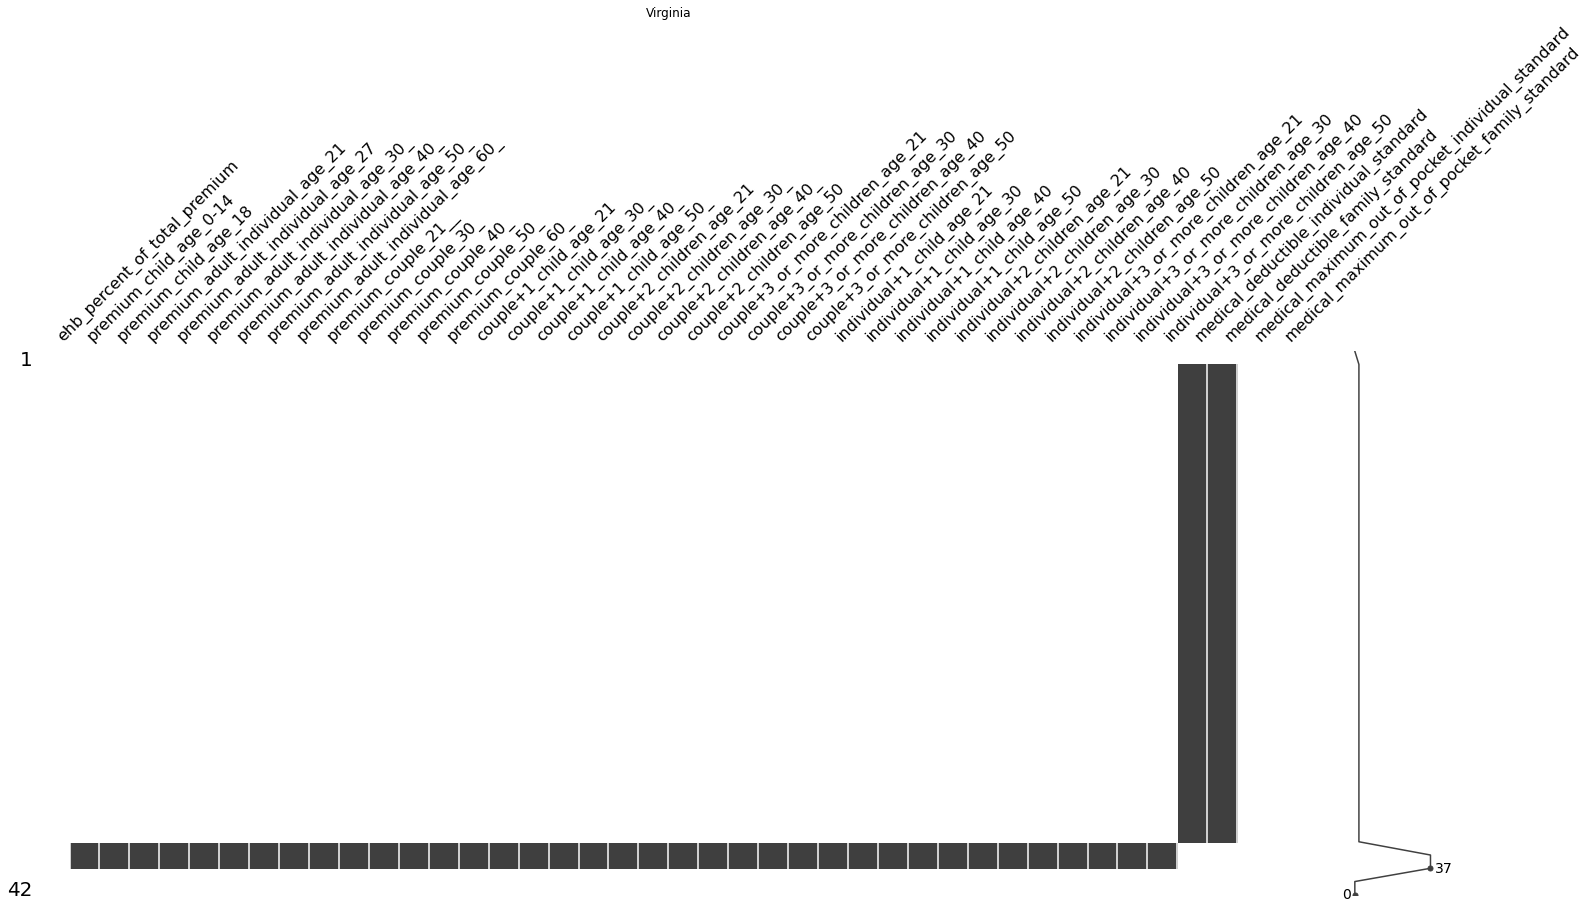

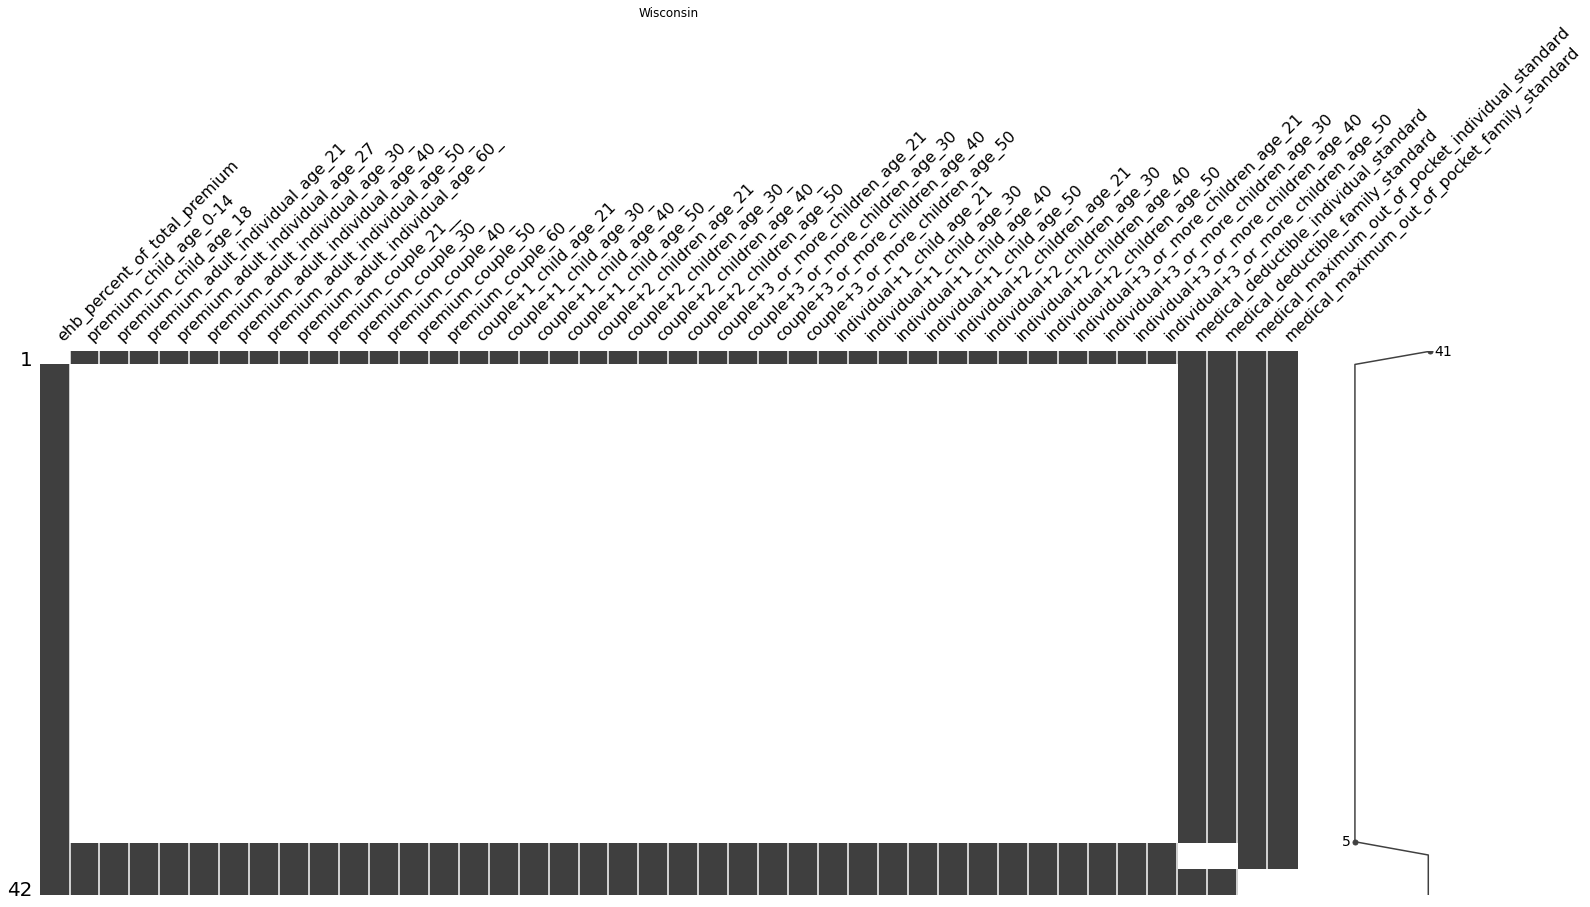

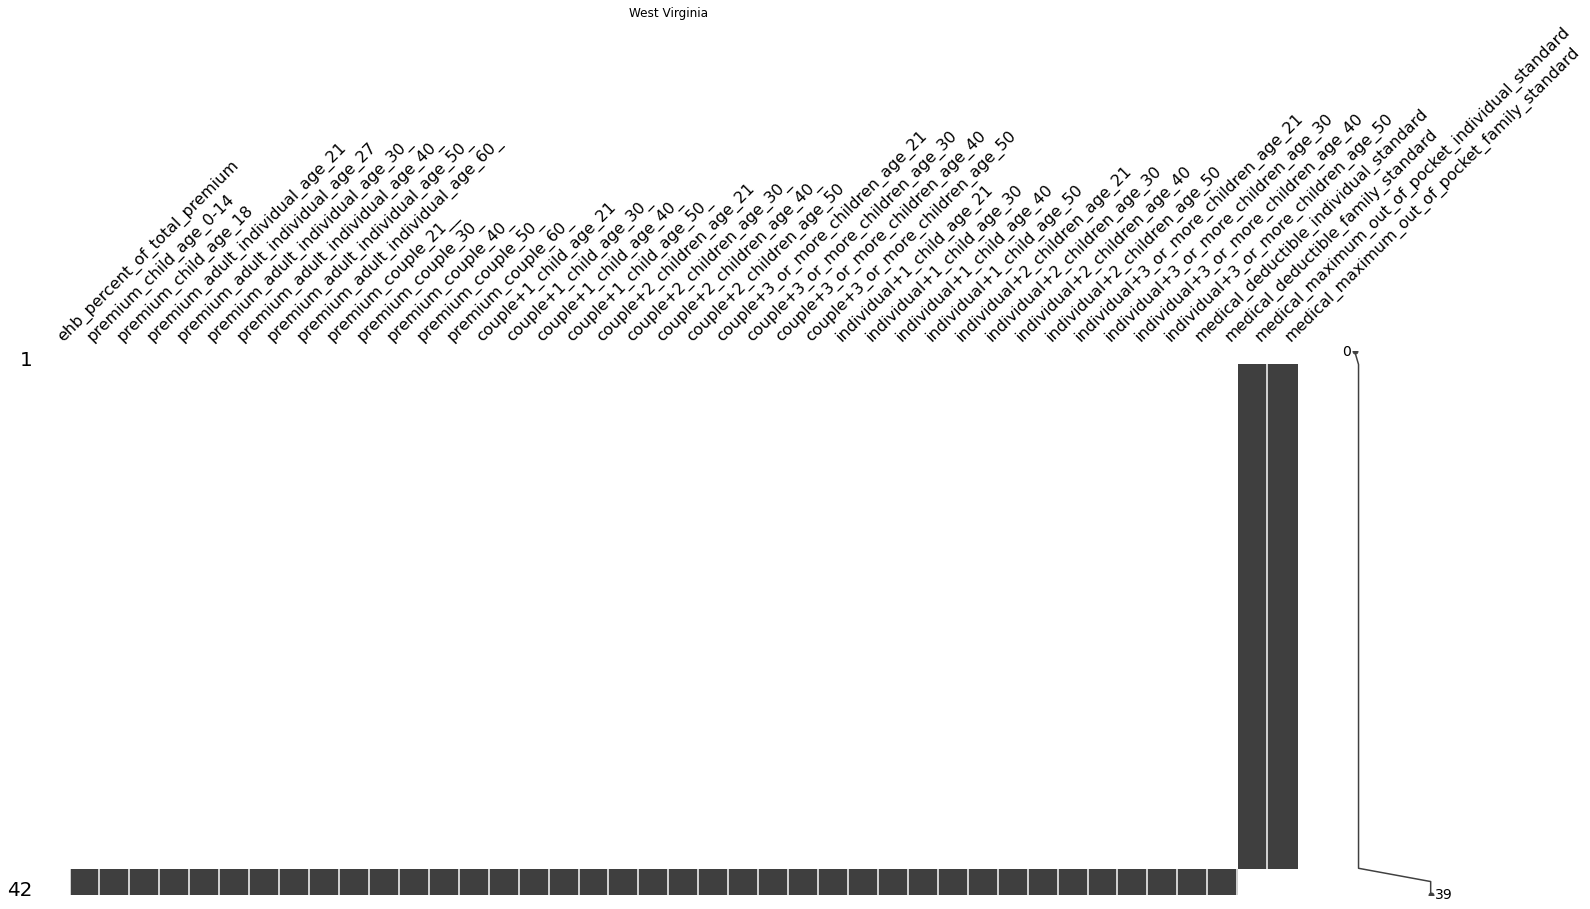

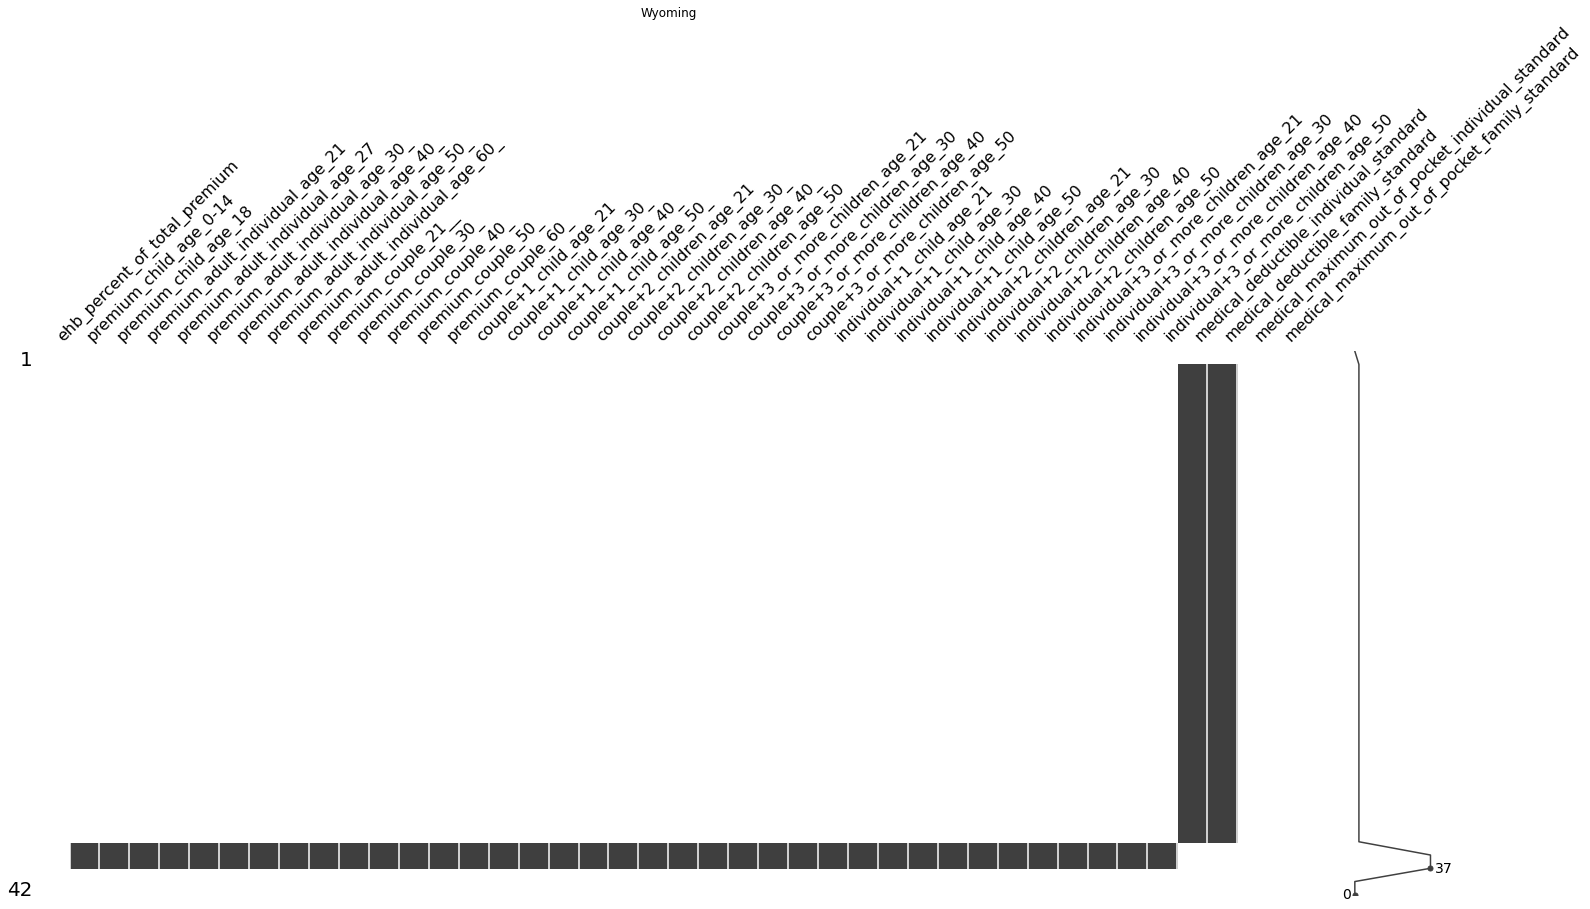

In [30]:
# Look at correlation values at the state level; see if the r-values are different
plt.close()
for state in plans_df.state.unique().tolist()[20:len(plans_df.state.unique().tolist())]:
    temp_df = plans_df[plans_df.state==state]
    temp_df = temp_df.corr()
    temp_df = temp_df[(temp_df < 0.75) & (temp_df > -0.75)]
    msno.matrix(temp_df)
    plt.title(state)

In [47]:
# Look at different dependent variables' correlations, overall look
dep_corr = acs_df.corr()
dep_corr

percent_uninsured_population  \
percent_uninsured_population                                            1.000000   
percent_uninsured_population_age_under_6_years                          0.525971   
percent_uninsured_population_age_19_to_25_years                         0.806440   
percent_uninsured_population_age_26_to_34_years                         0.824271   
percent_uninsured_population_age_35_to_44_years                         0.841268   
percent_uninsured_population_age_55_to_64_years                         0.816214   
percent_uninsured_population_age_65_to_74_years                         0.420105   
percent_uninsured_population_age_75_years_and_o...                      0.234871   
percent_uninsured_population_age_under_19_years                         0.740162   
percent_uninsured_population_age_19_to_64_years                         0.968289   
percent_uninsured_population_age_65_years_and_o...                      0.406215   
percent_uninsured_population_sex_male                                   0.975913   
percent_uninsured_population_sex_female                                 0.972506   
percent_uninsured_population_race_and_hispanic_...                      0.896734   
percent_uninsured_population_race_and_hispanic_...                      0.811495   
percent_uninsured_population_living_arrangement...                      0.989566   
percent_uninsured_population_living_arrangement...                      0.945387   
percent_uninsured_population_living_arrangement...                      0.745603   
percent_uninsured_population_nativity_and_u.s._...                      0.970292   
percent_uninsured_population_disability_status_...                      0.709925   
percent_uninsured_population_disability_status_...                      0.993103   
percent_uninsured_population_educational_attain...                      0.967702   
percent_uninsured_population_educational_attain...                      0.695554   
percent_uninsured_population_educational_attain...                      0.860261   
percent_uninsured_population_educational_attain...                      0.814239   
percent_uninsured_population_employment_status_...                      0.968289   
percent_uninsured_population_employment_status_...                      0.936515   
percent_uninsured_population_employment_status_...                      0.928314   
percent_uninsured_population_employment_status_...                      0.882561   
percent_uninsured_population_work_experience_po...                      0.968289   
percent_uninsured_population_work_experience_po...                      0.897655   
percent_uninsured_population_work_experience_po...                      0.854989   
percent_uninsured_population_work_experience_po...                      0.870789   
percent_uninsured_population_household_income_(...                      0.998197   
percent_uninsured_population_household_income_(...                      0.778909   
percent_uninsured_population_household_income_(...                      0.851324   
percent_uninsured_population_household_income_(...                      0.797116   
percent_uninsured_population_household_income_(...                      0.711667   
percent_uninsured_population_ratio_of_income_to...                      0.999537   
percent_uninsured_population_ratio_of_income_to...                      0.808321   
percent_uninsured_population_ratio_of_income_to...                      0.921305   
percent_uninsured_population_ratio_of_income_to...                      0.744454   
percent_uninsured_population_ratio_of_income_to...                      0.747949   

                                                    percent_uninsured_population_age_under_6_years  \
percent_uninsured_population                                                              0.525971   
percent_uninsured_population_age_under_6_years                                            1.000000   
percent_uninsured_population_age_19_to_25_years  

In [48]:
# Look at which dep variables are collinear (those that are collinear while appear as NaN)
dep_corr = dep_corr[(dep_corr < 0.75) & (dep_corr > -0.75)]
dep_corr

percent_uninsured_population  \
percent_uninsured_population                                                 NaN   
percent_uninsured_population_age_under_6_years                          0.525971   
percent_uninsured_population_age_19_to_25_years                              NaN   
percent_uninsured_population_age_26_to_34_years                              NaN   
percent_uninsured_population_age_35_to_44_years                              NaN   
percent_uninsured_population_age_55_to_64_years                              NaN   
percent_uninsured_population_age_65_to_74_years                         0.420105   
percent_uninsured_population_age_75_years_and_o...                      0.234871   
percent_uninsured_population_age_under_19_years                         0.740162   
percent_uninsured_population_age_19_to_64_years                              NaN   
percent_uninsured_population_age_65_years_and_o...                      0.406215   
percent_uninsured_population_sex_male                                        NaN   
percent_uninsured_population_sex_female                                      NaN   
percent_uninsured_population_race_and_hispanic_...                           NaN   
percent_uninsured_population_race_and_hispanic_...                           NaN   
percent_uninsured_population_living_arrangement...                           NaN   
percent_uninsured_population_living_arrangement...                           NaN   
percent_uninsured_population_living_arrangement...                      0.745603   
percent_uninsured_population_nativity_and_u.s._...                           NaN   
percent_uninsured_population_disability_status_...                      0.709925   
percent_uninsured_population_disability_status_...                           NaN   
percent_uninsured_population_educational_attain...                           NaN   
percent_uninsured_population_educational_attain...                      0.695554   
percent_uninsured_population_educational_attain...                           NaN   
percent_uninsured_population_educational_attain...                           NaN   
percent_uninsured_population_employment_status_...                           NaN   
percent_uninsured_population_employment_status_...                           NaN   
percent_uninsured_population_employment_status_...                           NaN   
percent_uninsured_population_employment_status_...                           NaN   
percent_uninsured_population_work_experience_po...                           NaN   
percent_uninsured_population_work_experience_po...                           NaN   
percent_uninsured_population_work_experience_po...                           NaN   
percent_uninsured_population_work_experience_po...                           NaN   
percent_uninsured_population_household_income_(...                           NaN   
percent_uninsured_population_household_income_(...                           NaN   
percent_uninsured_population_household_income_(...                           NaN   
percent_uninsured_population_household_income_(...                           NaN   
percent_uninsured_population_household_income_(...                      0.711667   
percent_uninsured_population_ratio_of_income_to...                           NaN   
percent_uninsured_population_ratio_of_income_to...                           NaN   
percent_uninsured_population_ratio_of_income_to...                           NaN   
percent_uninsured_population_ratio_of_income_to...                      0.744454   
percent_uninsured_population_ratio_of_income_to...                      0.747949   

                                                    percent_uninsured_population_age_under_6_years  \
percent_uninsured_population                                                              0.525971   
percent_uninsured_population_age_under_6_years                                                 NaN   
percent_uninsured_population_age_19_to_25_years  

<AxesSubplot:>

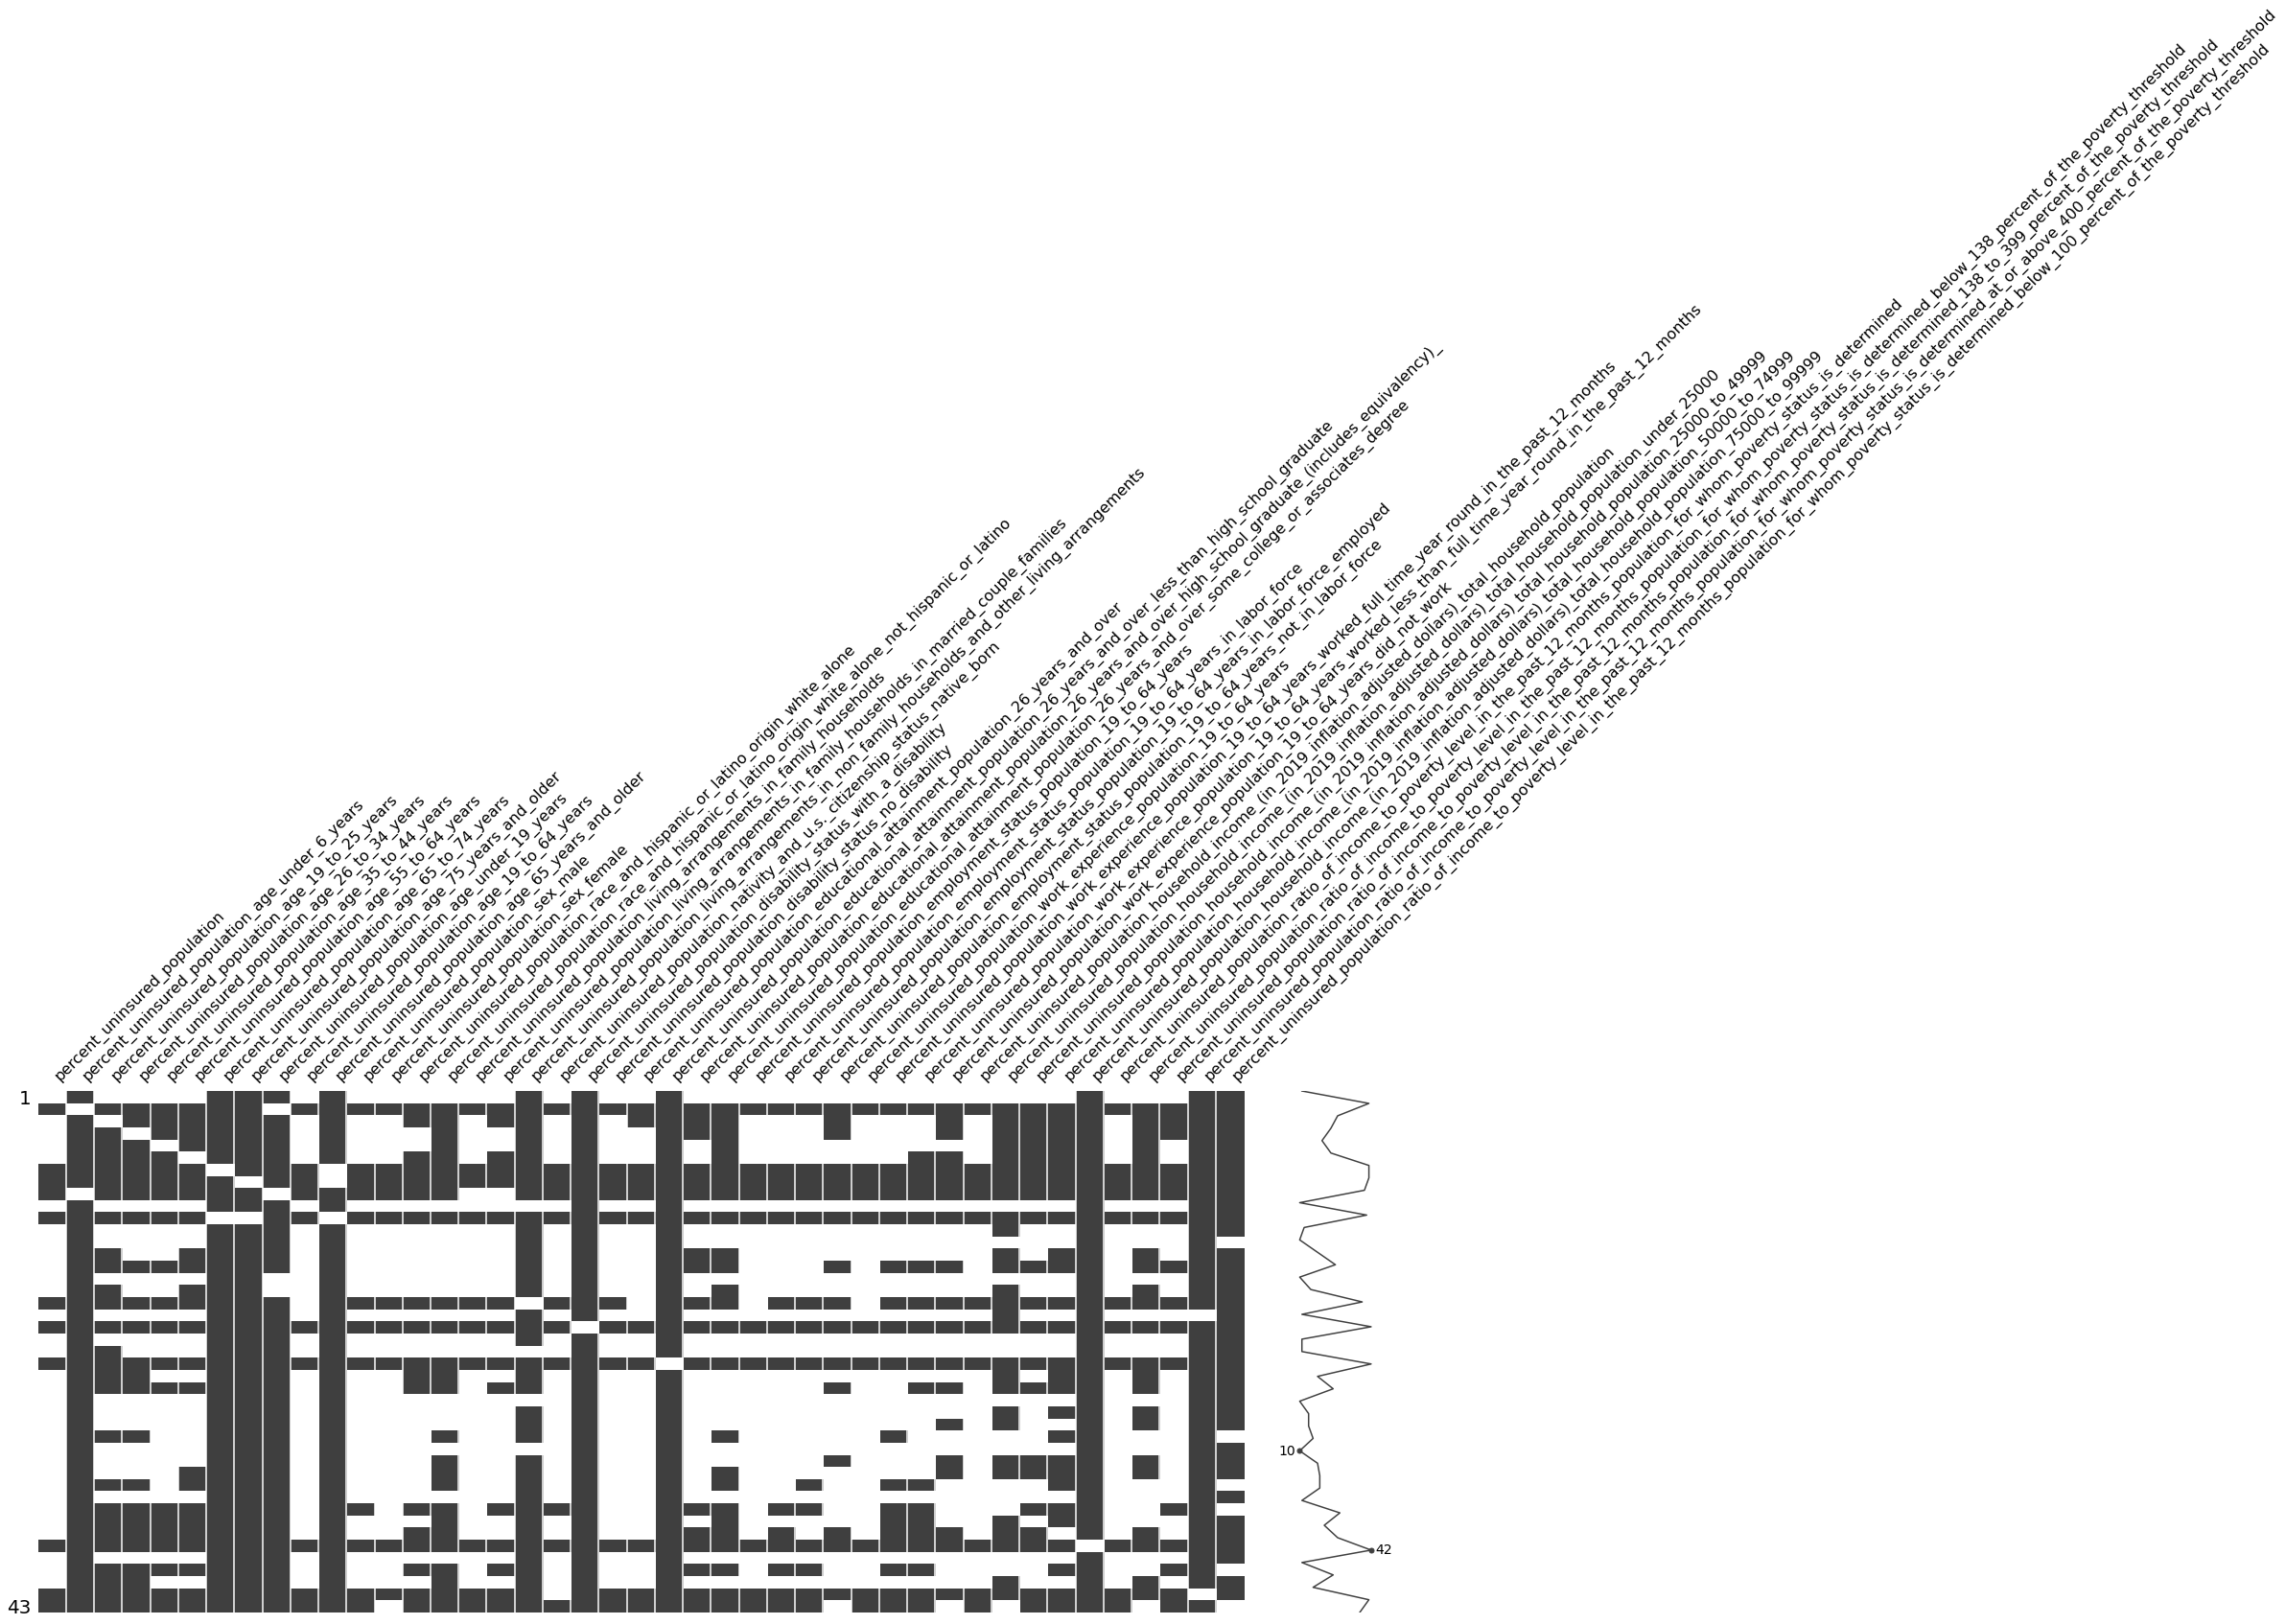

In [49]:
# Look at collinearity for dependent variables
msno.matrix(dep_corr)

In [72]:
# Create correlation matrix
merged_corr_df = acs_corr_df.merge(plans_corr_df, on="state", how="outer")

merged_corr_df.corr()

percent_uninsured_population  \
percent_uninsured_population                                           1.000000   
percent_uninsured_population_age_under_6_years                         0.525971   
percent_uninsured_population_age_19_to_25_years                        0.806440   
percent_uninsured_population_age_26_to_34_years                        0.824271   
percent_uninsured_population_age_35_to_44_years                        0.841268   
...                                                                         ...   
individual+3_or_more_children_age_50                                        NaN   
medical_deductible_individual_standard                                      NaN   
medical_deductible_family_standard                                          NaN   
medical_maximum_out_of_pocket_individual_standard                           NaN   
medical_maximum_out_of_pocket_family_standard                               NaN   

                                                   percent_uninsured_population_age_under_6_years  \
percent_uninsured_population                                                             0.525971   
percent_uninsured_population_age_under_6_years                                           1.000000   
percent_uninsured_population_age_19_to_25_years                                          0.345187   
percent_uninsured_population_age_26_to_34_years                                          0.371327   
percent_uninsured_population_age_35_to_44_years                                          0.324274   
...                                                                                           ...   
individual+3_or_more_children_age_50                                                          NaN   
medical_deductible_individual_standard                                                        NaN   
medical_deductible_family_standard                                                            NaN   
medical_maximum_out_of_pocket_individual_standard                                             NaN   
medical_maximum_out_of_pocket_family_standard                                                 NaN   

                                                   percent_uninsured_population_age_19_to_25_years  \
percent_uninsured_population                                                              0.806440   
percent_uninsured_population_age_under_6_years                                            0.345187   
percent_uninsured_population_age_19_to_25_years                                           1.000000   
percent_uninsured_population_age_26_to_34_years                                           0.655177   
percent_uninsured_population_age_35_to_44_years                                           0.677935   
...                                                                                            ...   
individual+3_or_more_children_age_50                                                           NaN   
medical_deductible_individual_standard                                                         NaN   
medical_deductible_family_standard                                                             NaN   
medical_maximum_out_of_pocket_individual_standard                                              NaN   
medical_maximum_out_of_pocket_family_standard                                                  NaN   

                                                   percent_uninsured_population_age_26_to_34_years  \
percent_uninsured_population                                                              0.824271   
percent_uninsured_population_age_under_6_years                                            0.371327   
percent_uninsured_population_age_19_to_25_years                                           0.655177   
percent_uninsured_population_age_26_to_34_years                                           1.000000   
percent_uninsured_population_age_35_to_44_years                                           0.683677   
... 

In [ ]:
# Computing VIF 
# the independent variables set
sub_plans_df = plans_df[plans_df.state=='Texas'].drop(columns=['plan_id', 'state', 'metal_level', 'issuer_name', 'plan_marketing_name',
                                    'plan_type'])
vif_data_copy = sub_plans_df.copy()


while not vif_data_copy.empty:
    interesting_var = sub_plans_df.columns.to_list()
    X = sub_plans_df[interesting_var]

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data)

    if float('inf') in vif_data["VIF"].unique():
        feature_list = vif_data[vif_data['VIF']==float("inf")].feature.to_list()
        sub_plans_df = sub_plans_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    elif ~ vif_data[vif_data['VIF'] >= 5].empty:
        feature_list = vif_data[vif_data['VIF']>= 5].feature.to_list()
        sub_plans_df = sub_plans_df.drop(columns=feature_list[0])
        vif_data_copy = vif_data[vif_data.feature!= feature_list[0]]
    else:
        vif_data_copy = pd.DataFrame()

sub_plans_df